# Assignment2

## Import Necessary Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import models
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Add this line
import warnings

In [ ]:
!pip install  scikit-learn

## Dataset Loading

In [ ]:
# Set device (use MPS for Apple Silicon, CUDA for other GPUs)
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define the CIFAR-10 data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for compatibility with pre-trained models
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

cuda


100%|██████████| 170M/170M [00:36<00:00, 4.61MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


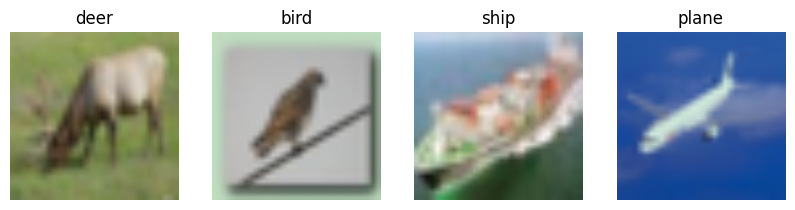

In [ ]:
def show_cifar10_examples(dataset, classes, num_images=4):
    data_loader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    images, labels = next(iter(data_loader))
    images = images / 2 + 0.5  # Unnormalize images
    np_images = images.numpy()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(np.transpose(np_images[i], (1, 2, 0)))
        plt.title(classes[labels[i]])
        plt.axis("off")
    plt.show()

# Define CIFAR-10 class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Show CIFAR-10 examples
show_cifar10_examples(train_dataset, classes)

Files already downloaded and verified
Files already downloaded and verified

Training ResNet18 with ADAM optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 34.77it/s]


Train Loss: 2.1991, Train Acc: 21.82%, Val Loss: 1.8479, Val Acc: 27.63%


Epoch 2/20: 100%|██████████| 625/625 [00:18<00:00, 34.51it/s]


Train Loss: 1.7291, Train Acc: 30.55%, Val Loss: 1.6985, Val Acc: 31.90%


Epoch 3/20: 100%|██████████| 625/625 [00:18<00:00, 34.61it/s]


Train Loss: 1.6240, Train Acc: 36.12%, Val Loss: 1.5965, Val Acc: 36.52%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 35.00it/s]


Train Loss: 1.5357, Train Acc: 39.75%, Val Loss: 1.7467, Val Acc: 37.21%


Epoch 5/20: 100%|██████████| 625/625 [00:18<00:00, 34.68it/s]


Train Loss: 1.4660, Train Acc: 43.10%, Val Loss: 1.3553, Val Acc: 47.51%


Epoch 6/20: 100%|██████████| 625/625 [00:18<00:00, 34.65it/s]


Train Loss: 1.3891, Train Acc: 46.97%, Val Loss: 1.3789, Val Acc: 50.00%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 34.73it/s]


Train Loss: 1.3128, Train Acc: 50.82%, Val Loss: 1.3157, Val Acc: 52.07%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 34.77it/s]


Train Loss: 1.3349, Train Acc: 51.85%, Val Loss: 1.5062, Val Acc: 44.29%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 34.78it/s]


Train Loss: 1.2537, Train Acc: 54.49%, Val Loss: 1.3786, Val Acc: 57.66%


Epoch 10/20: 100%|██████████| 625/625 [00:18<00:00, 34.55it/s]


Train Loss: 1.1531, Train Acc: 59.44%, Val Loss: 1.2224, Val Acc: 59.23%


Epoch 11/20: 100%|██████████| 625/625 [00:18<00:00, 34.54it/s]


Train Loss: 1.0990, Train Acc: 61.44%, Val Loss: 1.3931, Val Acc: 55.98%


Epoch 12/20: 100%|██████████| 625/625 [00:18<00:00, 34.34it/s]


Train Loss: 1.0470, Train Acc: 63.91%, Val Loss: 1.1779, Val Acc: 62.26%


Epoch 13/20: 100%|██████████| 625/625 [00:18<00:00, 34.62it/s]


Train Loss: 1.0000, Train Acc: 65.84%, Val Loss: 1.2139, Val Acc: 61.04%


Epoch 14/20: 100%|██████████| 625/625 [00:17<00:00, 35.05it/s]


Train Loss: 0.9707, Train Acc: 66.95%, Val Loss: 1.2304, Val Acc: 63.89%


Epoch 15/20: 100%|██████████| 625/625 [00:17<00:00, 34.75it/s]


Train Loss: 0.9007, Train Acc: 69.06%, Val Loss: 1.2105, Val Acc: 63.70%
Early stopping triggered


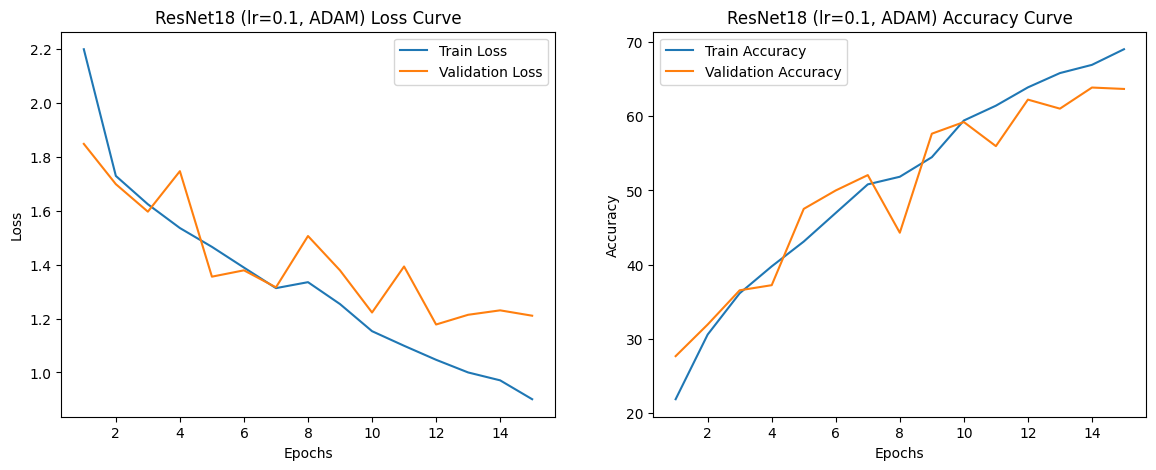


Training ResNet18 with SGD optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 36.21it/s]


Train Loss: 1.6995, Train Acc: 42.32%, Val Loss: 1.4434, Val Acc: 51.15%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 36.27it/s]


Train Loss: 1.1713, Train Acc: 58.77%, Val Loss: 1.1468, Val Acc: 58.77%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 36.58it/s]


Train Loss: 0.9477, Train Acc: 66.75%, Val Loss: 1.0797, Val Acc: 62.12%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 36.43it/s]


Train Loss: 0.7975, Train Acc: 72.06%, Val Loss: 0.9437, Val Acc: 67.29%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 36.27it/s]


Train Loss: 0.6621, Train Acc: 76.95%, Val Loss: 0.8854, Val Acc: 70.06%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 36.27it/s]


Train Loss: 0.5551, Train Acc: 80.76%, Val Loss: 0.8883, Val Acc: 71.11%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 36.24it/s]


Train Loss: 0.4594, Train Acc: 83.87%, Val Loss: 0.9093, Val Acc: 71.62%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 36.27it/s]


Train Loss: 0.3767, Train Acc: 86.67%, Val Loss: 0.9575, Val Acc: 71.57%
Early stopping triggered


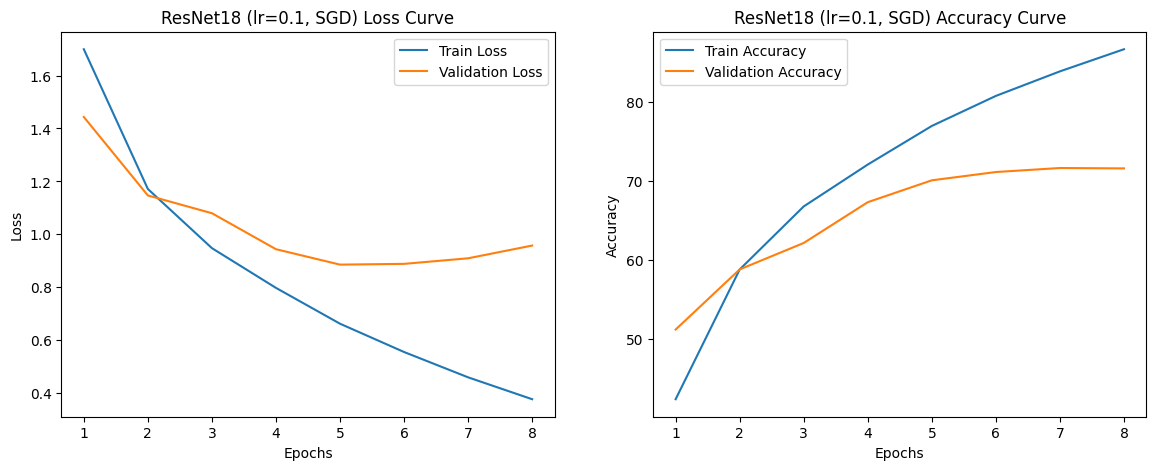


Training ResNet18 with SGD_NESTEROV optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 35.60it/s]


Train Loss: 1.9815, Train Acc: 32.60%, Val Loss: 1.4849, Val Acc: 44.85%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 35.33it/s]


Train Loss: 1.3750, Train Acc: 50.16%, Val Loss: 1.2741, Val Acc: 53.00%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 35.78it/s]


Train Loss: 1.1608, Train Acc: 58.70%, Val Loss: 1.0947, Val Acc: 61.72%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 35.66it/s]


Train Loss: 1.0058, Train Acc: 64.59%, Val Loss: 0.9878, Val Acc: 65.02%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.80it/s]


Train Loss: 0.8737, Train Acc: 69.35%, Val Loss: 0.9021, Val Acc: 68.56%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 35.87it/s]


Train Loss: 0.7697, Train Acc: 72.98%, Val Loss: 0.8981, Val Acc: 68.81%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 35.60it/s]


Train Loss: 0.6753, Train Acc: 76.39%, Val Loss: 0.9339, Val Acc: 68.95%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 35.83it/s]


Train Loss: 0.5811, Train Acc: 79.58%, Val Loss: 0.8907, Val Acc: 70.45%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 35.71it/s]


Train Loss: 0.5045, Train Acc: 82.49%, Val Loss: 0.9163, Val Acc: 71.27%


Epoch 10/20: 100%|██████████| 625/625 [00:17<00:00, 35.61it/s]


Train Loss: 0.4287, Train Acc: 85.00%, Val Loss: 0.9409, Val Acc: 70.70%


Epoch 11/20: 100%|██████████| 625/625 [00:17<00:00, 35.87it/s]


Train Loss: 0.3618, Train Acc: 87.33%, Val Loss: 1.0053, Val Acc: 70.98%
Early stopping triggered


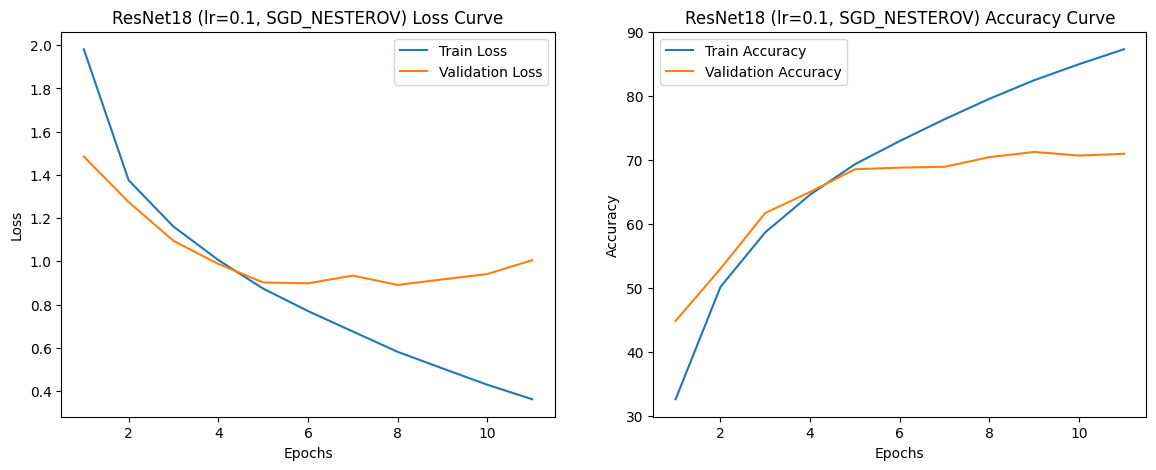


Training ResNet18 with ADAM optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:18<00:00, 34.64it/s]


Train Loss: 1.7852, Train Acc: 36.38%, Val Loss: 1.4086, Val Acc: 48.22%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 34.77it/s]


Train Loss: 1.2812, Train Acc: 53.89%, Val Loss: 1.2099, Val Acc: 56.87%


Epoch 3/20: 100%|██████████| 625/625 [00:18<00:00, 33.29it/s]


Train Loss: 1.0418, Train Acc: 63.44%, Val Loss: 1.0290, Val Acc: 63.37%


Epoch 4/20: 100%|██████████| 625/625 [00:19<00:00, 32.75it/s]


Train Loss: 0.8919, Train Acc: 68.64%, Val Loss: 0.9334, Val Acc: 67.60%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.17it/s]


Train Loss: 0.7809, Train Acc: 72.81%, Val Loss: 0.8465, Val Acc: 71.00%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 34.81it/s]


Train Loss: 0.6749, Train Acc: 76.79%, Val Loss: 0.8348, Val Acc: 71.67%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 34.81it/s]


Train Loss: 0.5821, Train Acc: 79.65%, Val Loss: 0.8305, Val Acc: 72.07%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 35.00it/s]


Train Loss: 0.4905, Train Acc: 83.22%, Val Loss: 0.8592, Val Acc: 72.34%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 34.86it/s]


Train Loss: 0.4000, Train Acc: 86.26%, Val Loss: 0.8812, Val Acc: 73.25%


Epoch 10/20: 100%|██████████| 625/625 [00:17<00:00, 34.87it/s]


Train Loss: 0.3326, Train Acc: 88.33%, Val Loss: 0.8411, Val Acc: 74.51%
Early stopping triggered


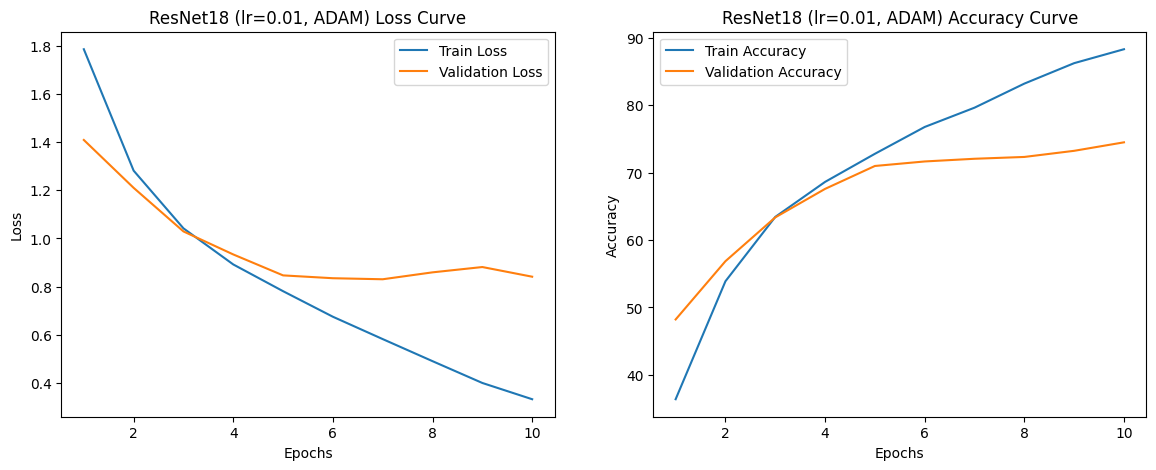


Training ResNet18 with SGD optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 36.01it/s]


Train Loss: 1.6187, Train Acc: 41.38%, Val Loss: 1.3836, Val Acc: 50.68%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 35.93it/s]


Train Loss: 1.2803, Train Acc: 54.23%, Val Loss: 1.2555, Val Acc: 55.78%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 35.81it/s]


Train Loss: 1.0839, Train Acc: 61.28%, Val Loss: 1.1864, Val Acc: 58.38%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 36.33it/s]


Train Loss: 0.9183, Train Acc: 67.36%, Val Loss: 1.1707, Val Acc: 60.01%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.92it/s]


Train Loss: 0.7737, Train Acc: 72.79%, Val Loss: 1.1274, Val Acc: 62.39%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 35.76it/s]


Train Loss: 0.6438, Train Acc: 77.31%, Val Loss: 1.1455, Val Acc: 62.40%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 35.87it/s]


Train Loss: 0.5190, Train Acc: 81.78%, Val Loss: 1.1918, Val Acc: 62.92%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 35.96it/s]


Train Loss: 0.4064, Train Acc: 85.78%, Val Loss: 1.3638, Val Acc: 61.57%
Early stopping triggered


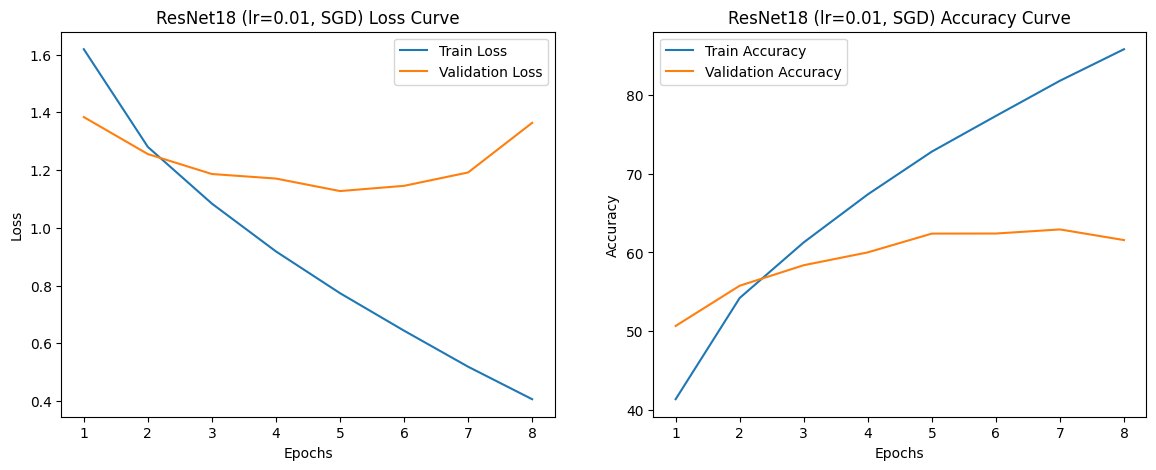


Training ResNet18 with SGD_NESTEROV optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 35.34it/s]


Train Loss: 1.5220, Train Acc: 45.77%, Val Loss: 1.2574, Val Acc: 55.84%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 35.95it/s]


Train Loss: 1.1094, Train Acc: 60.85%, Val Loss: 1.0573, Val Acc: 62.77%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 35.82it/s]


Train Loss: 0.9020, Train Acc: 68.31%, Val Loss: 1.1054, Val Acc: 64.19%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 35.33it/s]


Train Loss: 0.7585, Train Acc: 73.62%, Val Loss: 0.8833, Val Acc: 69.77%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.73it/s]


Train Loss: 0.6263, Train Acc: 78.18%, Val Loss: 0.9543, Val Acc: 68.53%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 36.07it/s]


Train Loss: 0.5273, Train Acc: 81.52%, Val Loss: 0.9483, Val Acc: 70.17%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 35.81it/s]


Train Loss: 0.4230, Train Acc: 85.00%, Val Loss: 0.9211, Val Acc: 71.76%
Early stopping triggered


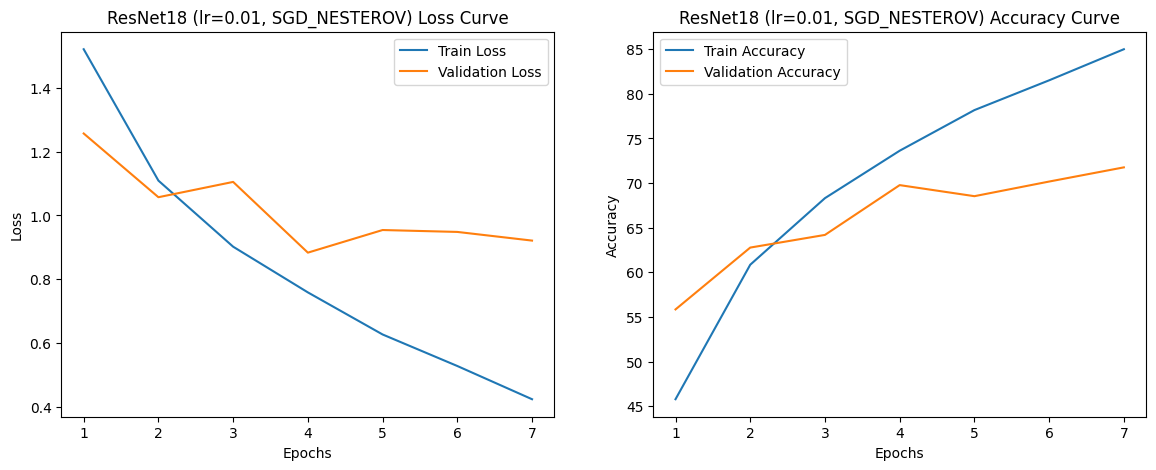


Training ResNet18 with ADAM optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 34.91it/s]


Train Loss: 1.4315, Train Acc: 48.58%, Val Loss: 1.1569, Val Acc: 59.05%


Epoch 2/20: 100%|██████████| 625/625 [00:18<00:00, 34.67it/s]


Train Loss: 1.0312, Train Acc: 63.62%, Val Loss: 1.0296, Val Acc: 64.24%


Epoch 3/20: 100%|██████████| 625/625 [00:18<00:00, 34.58it/s]


Train Loss: 0.8468, Train Acc: 70.52%, Val Loss: 0.9358, Val Acc: 67.96%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 34.95it/s]


Train Loss: 0.7205, Train Acc: 74.91%, Val Loss: 0.8470, Val Acc: 71.12%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 34.96it/s]


Train Loss: 0.6155, Train Acc: 78.66%, Val Loss: 0.7967, Val Acc: 72.81%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 34.73it/s]


Train Loss: 0.5098, Train Acc: 82.35%, Val Loss: 0.7734, Val Acc: 74.48%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 34.74it/s]


Train Loss: 0.4265, Train Acc: 85.12%, Val Loss: 0.8637, Val Acc: 72.91%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 34.85it/s]


Train Loss: 0.3489, Train Acc: 87.69%, Val Loss: 0.8158, Val Acc: 75.22%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 34.74it/s]


Train Loss: 0.2745, Train Acc: 90.45%, Val Loss: 0.8841, Val Acc: 74.99%
Early stopping triggered


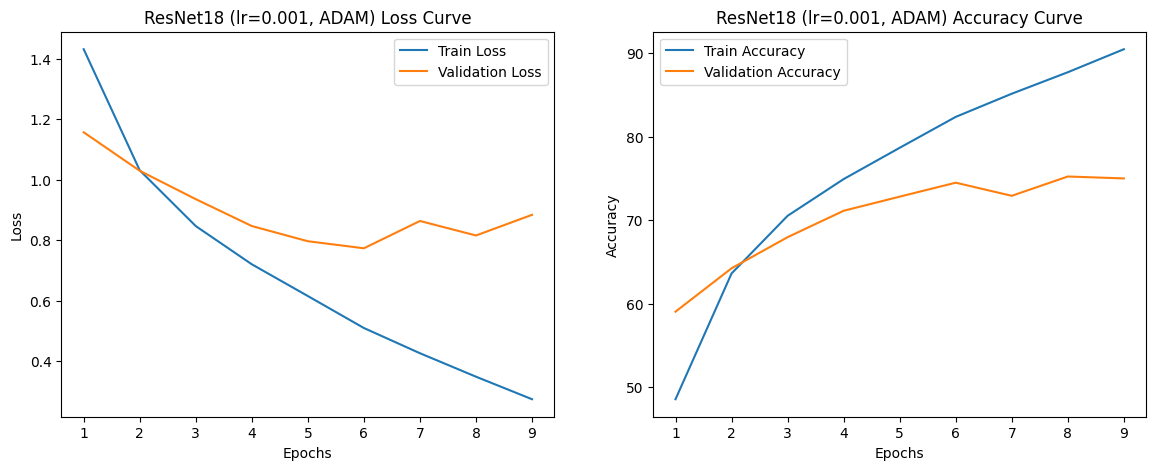


Training ResNet18 with SGD optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 35.77it/s]


Train Loss: 1.9887, Train Acc: 27.79%, Val Loss: 1.7461, Val Acc: 37.35%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 36.09it/s]


Train Loss: 1.6527, Train Acc: 40.13%, Val Loss: 1.5850, Val Acc: 42.75%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 36.08it/s]


Train Loss: 1.5038, Train Acc: 45.76%, Val Loss: 1.4921, Val Acc: 46.72%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 36.21it/s]


Train Loss: 1.3907, Train Acc: 50.10%, Val Loss: 1.4303, Val Acc: 48.28%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 36.10it/s]


Train Loss: 1.3108, Train Acc: 53.16%, Val Loss: 1.3853, Val Acc: 49.83%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 36.24it/s]


Train Loss: 1.2294, Train Acc: 56.17%, Val Loss: 1.3573, Val Acc: 50.89%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 36.27it/s]


Train Loss: 1.1624, Train Acc: 58.92%, Val Loss: 1.3348, Val Acc: 52.19%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 35.96it/s]


Train Loss: 1.0997, Train Acc: 61.09%, Val Loss: 1.3205, Val Acc: 52.73%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 36.12it/s]


Train Loss: 1.0401, Train Acc: 63.66%, Val Loss: 1.2965, Val Acc: 54.02%


Epoch 10/20: 100%|██████████| 625/625 [00:17<00:00, 35.92it/s]


Train Loss: 0.9766, Train Acc: 65.72%, Val Loss: 1.2953, Val Acc: 53.84%


Epoch 11/20: 100%|██████████| 625/625 [00:17<00:00, 35.63it/s]


Train Loss: 0.9196, Train Acc: 68.11%, Val Loss: 1.2935, Val Acc: 54.31%


Epoch 12/20: 100%|██████████| 625/625 [00:17<00:00, 35.13it/s]


Train Loss: 0.8613, Train Acc: 70.27%, Val Loss: 1.2902, Val Acc: 55.30%


Epoch 13/20: 100%|██████████| 625/625 [00:17<00:00, 35.72it/s]


Train Loss: 0.8020, Train Acc: 72.50%, Val Loss: 1.3037, Val Acc: 55.22%


Epoch 14/20: 100%|██████████| 625/625 [00:17<00:00, 36.06it/s]


Train Loss: 0.7466, Train Acc: 74.73%, Val Loss: 1.3211, Val Acc: 55.44%


Epoch 15/20: 100%|██████████| 625/625 [00:17<00:00, 36.02it/s]


Train Loss: 0.6932, Train Acc: 76.61%, Val Loss: 1.3198, Val Acc: 55.20%
Early stopping triggered


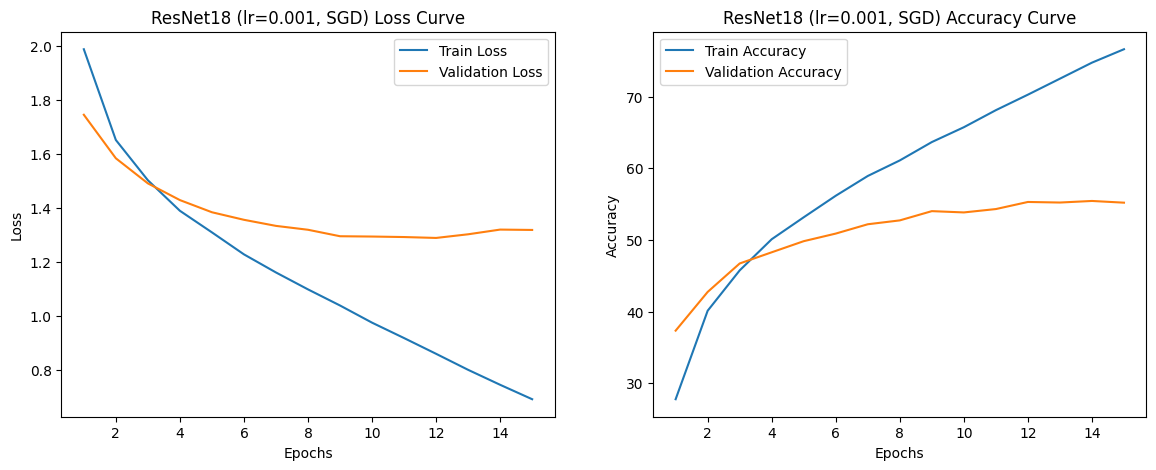


Training ResNet18 with SGD_NESTEROV optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 35.47it/s]


Train Loss: 1.6487, Train Acc: 40.00%, Val Loss: 1.4151, Val Acc: 48.71%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 35.41it/s]


Train Loss: 1.2917, Train Acc: 53.51%, Val Loss: 1.2460, Val Acc: 55.00%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 35.74it/s]


Train Loss: 1.0948, Train Acc: 60.67%, Val Loss: 1.1890, Val Acc: 58.11%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 36.06it/s]


Train Loss: 0.9371, Train Acc: 66.67%, Val Loss: 1.1553, Val Acc: 59.52%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.58it/s]


Train Loss: 0.7817, Train Acc: 72.35%, Val Loss: 1.1170, Val Acc: 61.83%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 35.72it/s]


Train Loss: 0.6474, Train Acc: 77.07%, Val Loss: 1.1420, Val Acc: 62.45%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 35.54it/s]


Train Loss: 0.5247, Train Acc: 81.47%, Val Loss: 1.2273, Val Acc: 61.63%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 35.64it/s]


Train Loss: 0.4167, Train Acc: 85.32%, Val Loss: 1.2724, Val Acc: 62.64%
Early stopping triggered


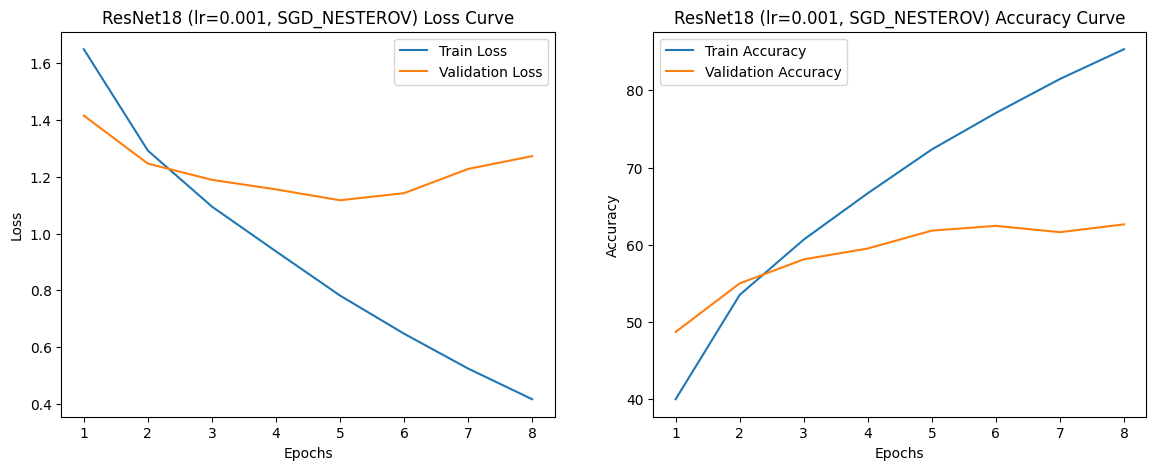


Best configuration for ResNet18 - Optimizer: ADAM, Learning Rate: 0.001, Validation Accuracy: 75.22%

Training MobileNetV2 with ADAM optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:25<00:00, 24.78it/s]


Train Loss: 2.4347, Train Acc: 16.60%, Val Loss: 2.0009, Val Acc: 15.75%


Epoch 2/20: 100%|██████████| 625/625 [00:25<00:00, 24.62it/s]


Train Loss: 1.9957, Train Acc: 19.09%, Val Loss: 1.9824, Val Acc: 20.02%


Epoch 3/20: 100%|██████████| 625/625 [00:25<00:00, 24.72it/s]


Train Loss: 1.9690, Train Acc: 19.68%, Val Loss: 1.8893, Val Acc: 22.25%


Epoch 4/20: 100%|██████████| 625/625 [00:25<00:00, 24.47it/s]


Train Loss: 1.9497, Train Acc: 21.44%, Val Loss: 1.9057, Val Acc: 23.94%


Epoch 5/20: 100%|██████████| 625/625 [00:25<00:00, 24.77it/s]


Train Loss: 1.9227, Train Acc: 23.72%, Val Loss: 1.7824, Val Acc: 27.74%


Epoch 6/20: 100%|██████████| 625/625 [00:25<00:00, 24.34it/s]


Train Loss: 1.9008, Train Acc: 25.28%, Val Loss: 1.7827, Val Acc: 29.20%


Epoch 7/20: 100%|██████████| 625/625 [00:25<00:00, 24.54it/s]


Train Loss: 1.8924, Train Acc: 25.96%, Val Loss: 1.7797, Val Acc: 32.53%


Epoch 8/20: 100%|██████████| 625/625 [00:25<00:00, 24.59it/s]


Train Loss: 1.8753, Train Acc: 27.04%, Val Loss: 1.7845, Val Acc: 28.99%


Epoch 9/20: 100%|██████████| 625/625 [00:25<00:00, 24.60it/s]


Train Loss: 1.8556, Train Acc: 28.38%, Val Loss: 1.8100, Val Acc: 29.09%


Epoch 10/20: 100%|██████████| 625/625 [00:25<00:00, 24.73it/s]


Train Loss: 1.8552, Train Acc: 28.19%, Val Loss: 1.6654, Val Acc: 37.04%


Epoch 11/20: 100%|██████████| 625/625 [00:25<00:00, 24.75it/s]


Train Loss: 1.8383, Train Acc: 28.37%, Val Loss: 1.8003, Val Acc: 28.04%


Epoch 12/20: 100%|██████████| 625/625 [00:25<00:00, 24.85it/s]


Train Loss: 1.8375, Train Acc: 28.28%, Val Loss: 1.7778, Val Acc: 32.69%


Epoch 13/20: 100%|██████████| 625/625 [00:25<00:00, 24.83it/s]


Train Loss: 1.8503, Train Acc: 27.37%, Val Loss: 1.8293, Val Acc: 28.52%
Early stopping triggered


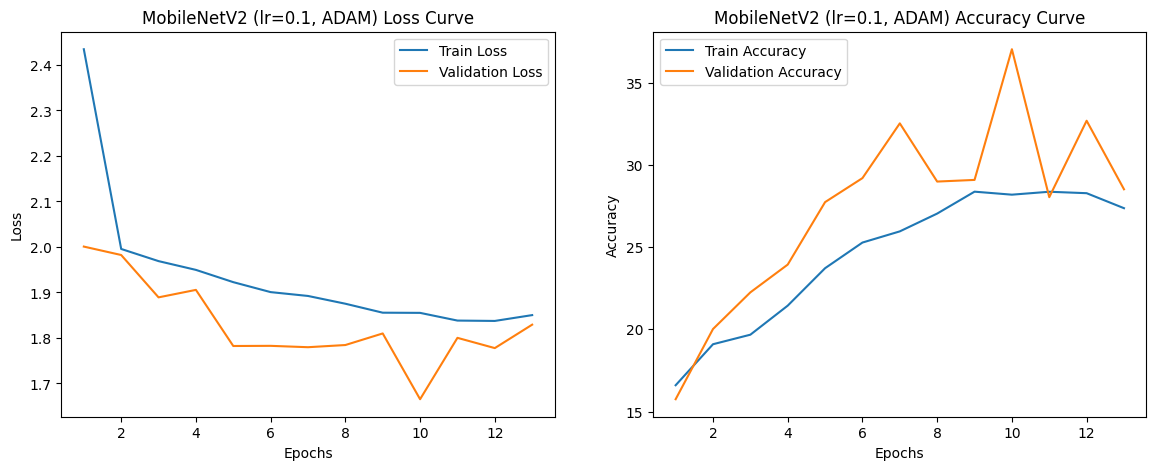


Training MobileNetV2 with SGD optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:24<00:00, 25.90it/s]


Train Loss: 2.1100, Train Acc: 29.10%, Val Loss: 1.6221, Val Acc: 40.92%


Epoch 2/20: 100%|██████████| 625/625 [00:23<00:00, 26.12it/s]


Train Loss: 1.5516, Train Acc: 43.89%, Val Loss: 1.4176, Val Acc: 48.38%


Epoch 3/20: 100%|██████████| 625/625 [00:23<00:00, 26.14it/s]


Train Loss: 1.3857, Train Acc: 50.30%, Val Loss: 1.3661, Val Acc: 51.24%


Epoch 4/20: 100%|██████████| 625/625 [00:24<00:00, 25.94it/s]


Train Loss: 1.2689, Train Acc: 55.01%, Val Loss: 1.2376, Val Acc: 56.15%


Epoch 5/20: 100%|██████████| 625/625 [00:24<00:00, 25.70it/s]


Train Loss: 1.1835, Train Acc: 58.01%, Val Loss: 1.1646, Val Acc: 58.49%


Epoch 6/20: 100%|██████████| 625/625 [00:24<00:00, 25.50it/s]


Train Loss: 1.1099, Train Acc: 60.62%, Val Loss: 1.1095, Val Acc: 60.70%


Epoch 7/20: 100%|██████████| 625/625 [00:24<00:00, 25.93it/s]


Train Loss: 1.0303, Train Acc: 63.85%, Val Loss: 1.0325, Val Acc: 63.33%


Epoch 8/20: 100%|██████████| 625/625 [00:24<00:00, 25.60it/s]


Train Loss: 0.9711, Train Acc: 65.82%, Val Loss: 1.0350, Val Acc: 63.90%


Epoch 9/20: 100%|██████████| 625/625 [00:24<00:00, 25.84it/s]


Train Loss: 0.9112, Train Acc: 67.97%, Val Loss: 1.0187, Val Acc: 64.27%


Epoch 10/20: 100%|██████████| 625/625 [00:24<00:00, 25.89it/s]


Train Loss: 0.8607, Train Acc: 69.91%, Val Loss: 1.0333, Val Acc: 63.68%


Epoch 11/20: 100%|██████████| 625/625 [00:24<00:00, 25.90it/s]


Train Loss: 0.8173, Train Acc: 71.56%, Val Loss: 0.9797, Val Acc: 66.16%


Epoch 12/20: 100%|██████████| 625/625 [00:24<00:00, 25.50it/s]


Train Loss: 0.7698, Train Acc: 73.13%, Val Loss: 1.0462, Val Acc: 64.57%


Epoch 13/20: 100%|██████████| 625/625 [00:24<00:00, 25.03it/s]


Train Loss: 0.7437, Train Acc: 74.06%, Val Loss: 0.9805, Val Acc: 66.56%


Epoch 14/20: 100%|██████████| 625/625 [00:25<00:00, 24.89it/s]


Train Loss: 0.6961, Train Acc: 75.68%, Val Loss: 1.0001, Val Acc: 66.04%
Early stopping triggered


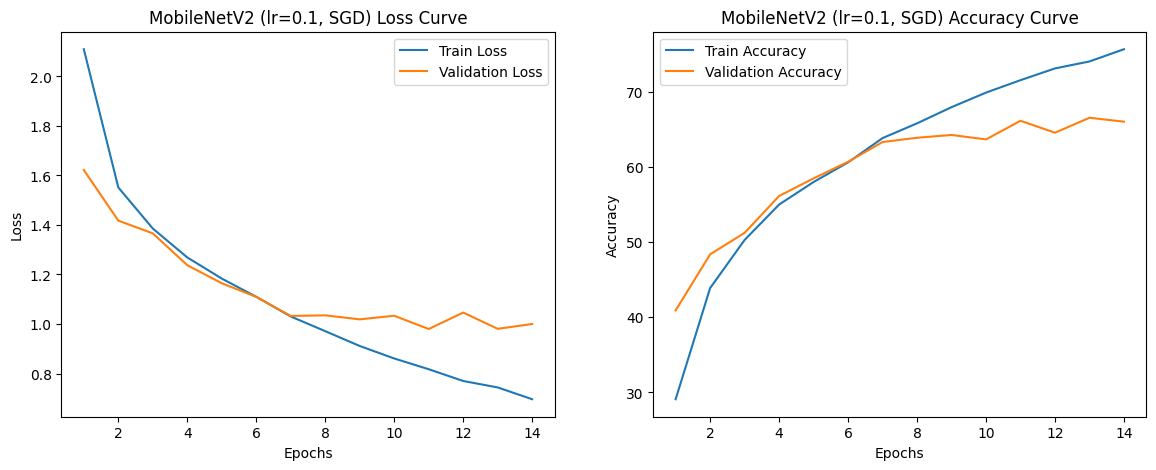


Training MobileNetV2 with SGD_NESTEROV optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:25<00:00, 24.53it/s]


Train Loss: 2.5091, Train Acc: 16.74%, Val Loss: 2.0633, Val Acc: 23.68%


Epoch 2/20: 100%|██████████| 625/625 [00:25<00:00, 24.66it/s]


Train Loss: 1.9610, Train Acc: 27.56%, Val Loss: 2.0079, Val Acc: 27.85%


Epoch 3/20: 100%|██████████| 625/625 [00:25<00:00, 24.77it/s]


Train Loss: 1.8058, Train Acc: 33.30%, Val Loss: 1.7356, Val Acc: 35.40%


Epoch 4/20: 100%|██████████| 625/625 [00:25<00:00, 24.75it/s]


Train Loss: 1.7291, Train Acc: 36.32%, Val Loss: 1.6841, Val Acc: 37.56%


Epoch 5/20: 100%|██████████| 625/625 [00:25<00:00, 24.11it/s]


Train Loss: 1.6682, Train Acc: 38.21%, Val Loss: 1.6188, Val Acc: 39.22%


Epoch 6/20: 100%|██████████| 625/625 [00:26<00:00, 23.64it/s]


Train Loss: 1.6109, Train Acc: 40.51%, Val Loss: 1.5791, Val Acc: 41.64%


Epoch 7/20: 100%|██████████| 625/625 [00:26<00:00, 23.75it/s]


Train Loss: 1.5772, Train Acc: 41.98%, Val Loss: 1.5038, Val Acc: 44.19%


Epoch 8/20: 100%|██████████| 625/625 [00:26<00:00, 23.80it/s]


Train Loss: 1.5521, Train Acc: 43.05%, Val Loss: 1.5148, Val Acc: 44.26%


Epoch 9/20: 100%|██████████| 625/625 [00:26<00:00, 23.59it/s]


Train Loss: 1.4937, Train Acc: 45.52%, Val Loss: 1.4825, Val Acc: 45.38%


Epoch 10/20: 100%|██████████| 625/625 [00:26<00:00, 23.86it/s]


Train Loss: 1.4626, Train Acc: 46.88%, Val Loss: 1.4674, Val Acc: 46.21%


Epoch 11/20: 100%|██████████| 625/625 [00:26<00:00, 23.56it/s]


Train Loss: 1.4221, Train Acc: 48.41%, Val Loss: 1.3591, Val Acc: 51.09%


Epoch 12/20: 100%|██████████| 625/625 [00:26<00:00, 23.69it/s]


Train Loss: 1.3669, Train Acc: 50.59%, Val Loss: 1.3230, Val Acc: 52.21%


Epoch 13/20: 100%|██████████| 625/625 [00:26<00:00, 23.78it/s]


Train Loss: 1.3355, Train Acc: 52.13%, Val Loss: 1.3246, Val Acc: 52.35%


Epoch 14/20: 100%|██████████| 625/625 [00:26<00:00, 23.59it/s]


Train Loss: 1.3066, Train Acc: 53.31%, Val Loss: 1.3679, Val Acc: 50.58%


Epoch 15/20: 100%|██████████| 625/625 [00:26<00:00, 23.78it/s]


Train Loss: 1.2829, Train Acc: 53.98%, Val Loss: 1.2579, Val Acc: 54.02%


Epoch 16/20: 100%|██████████| 625/625 [00:26<00:00, 23.58it/s]


Train Loss: 1.2408, Train Acc: 55.66%, Val Loss: 1.3678, Val Acc: 52.93%


Epoch 17/20: 100%|██████████| 625/625 [00:26<00:00, 23.66it/s]


Train Loss: 1.2158, Train Acc: 56.71%, Val Loss: 1.2485, Val Acc: 55.67%


Epoch 18/20: 100%|██████████| 625/625 [00:26<00:00, 23.63it/s]


Train Loss: 1.2124, Train Acc: 57.04%, Val Loss: 1.2064, Val Acc: 56.55%


Epoch 19/20: 100%|██████████| 625/625 [00:26<00:00, 23.71it/s]


Train Loss: 1.1897, Train Acc: 57.61%, Val Loss: 1.2955, Val Acc: 53.25%


Epoch 20/20: 100%|██████████| 625/625 [00:26<00:00, 23.65it/s]


Train Loss: 1.1987, Train Acc: 57.23%, Val Loss: 1.2958, Val Acc: 53.96%


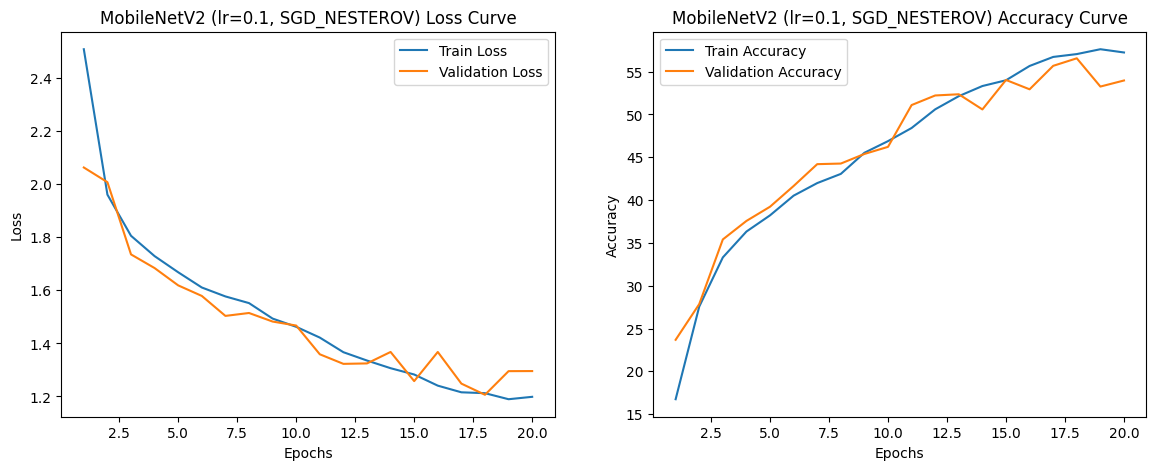


Training MobileNetV2 with ADAM optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:27<00:00, 22.62it/s]


Train Loss: 2.2955, Train Acc: 18.91%, Val Loss: 1.9406, Val Acc: 24.12%


Epoch 2/20: 100%|██████████| 625/625 [00:27<00:00, 22.45it/s]


Train Loss: 1.7982, Train Acc: 30.39%, Val Loss: 1.7159, Val Acc: 33.34%


Epoch 3/20: 100%|██████████| 625/625 [00:27<00:00, 22.71it/s]


Train Loss: 1.6255, Train Acc: 37.91%, Val Loss: 1.5825, Val Acc: 42.97%


Epoch 4/20: 100%|██████████| 625/625 [00:27<00:00, 22.57it/s]


Train Loss: 1.4735, Train Acc: 45.40%, Val Loss: 1.4609, Val Acc: 46.71%


Epoch 5/20: 100%|██████████| 625/625 [00:27<00:00, 22.53it/s]


Train Loss: 1.3355, Train Acc: 52.02%, Val Loss: 1.2348, Val Acc: 55.70%


Epoch 6/20: 100%|██████████| 625/625 [00:27<00:00, 22.70it/s]


Train Loss: 1.1944, Train Acc: 58.32%, Val Loss: 1.1467, Val Acc: 58.29%


Epoch 7/20: 100%|██████████| 625/625 [00:27<00:00, 22.62it/s]


Train Loss: 1.0875, Train Acc: 61.73%, Val Loss: 1.0648, Val Acc: 62.72%


Epoch 8/20: 100%|██████████| 625/625 [00:27<00:00, 22.71it/s]


Train Loss: 1.0292, Train Acc: 64.38%, Val Loss: 1.0597, Val Acc: 63.35%


Epoch 9/20: 100%|██████████| 625/625 [00:27<00:00, 22.56it/s]


Train Loss: 0.9609, Train Acc: 66.56%, Val Loss: 0.9663, Val Acc: 66.18%


Epoch 10/20: 100%|██████████| 625/625 [00:27<00:00, 22.63it/s]


Train Loss: 0.9163, Train Acc: 68.41%, Val Loss: 0.9415, Val Acc: 67.75%


Epoch 11/20: 100%|██████████| 625/625 [00:27<00:00, 22.54it/s]


Train Loss: 0.8639, Train Acc: 70.19%, Val Loss: 0.8615, Val Acc: 70.51%


Epoch 12/20: 100%|██████████| 625/625 [00:27<00:00, 22.73it/s]


Train Loss: 0.8299, Train Acc: 71.49%, Val Loss: 1.1520, Val Acc: 61.84%


Epoch 13/20: 100%|██████████| 625/625 [00:27<00:00, 22.69it/s]


Train Loss: 0.8009, Train Acc: 72.67%, Val Loss: 0.8710, Val Acc: 70.28%


Epoch 14/20: 100%|██████████| 625/625 [00:27<00:00, 22.61it/s]


Train Loss: 0.7733, Train Acc: 73.66%, Val Loss: 0.8826, Val Acc: 69.87%
Early stopping triggered


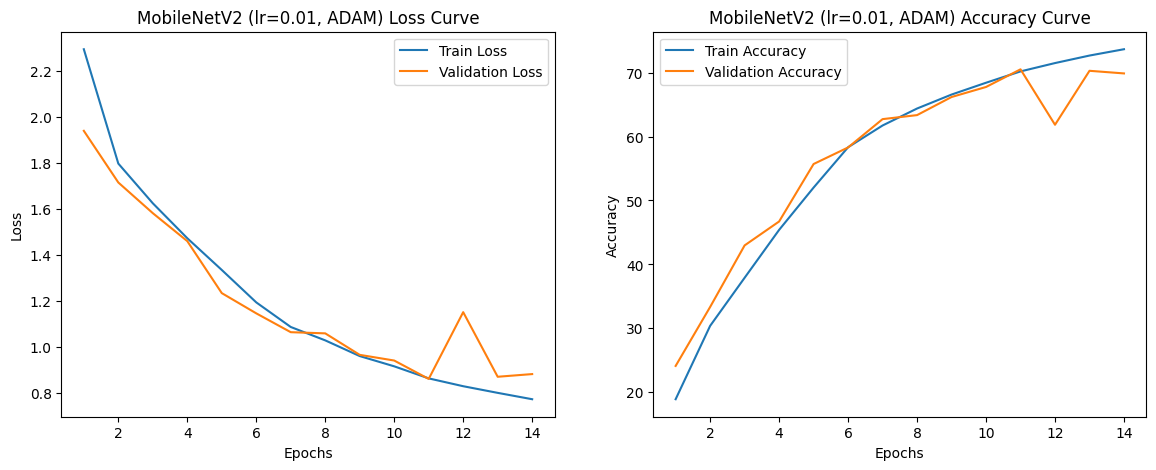


Training MobileNetV2 with SGD optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:26<00:00, 24.00it/s]


Train Loss: 2.0077, Train Acc: 24.16%, Val Loss: 1.7795, Val Acc: 34.20%


Epoch 2/20: 100%|██████████| 625/625 [00:25<00:00, 24.19it/s]


Train Loss: 1.6878, Train Acc: 37.65%, Val Loss: 1.5966, Val Acc: 40.68%


Epoch 3/20: 100%|██████████| 625/625 [00:25<00:00, 24.05it/s]


Train Loss: 1.5711, Train Acc: 42.27%, Val Loss: 1.5317, Val Acc: 43.89%


Epoch 4/20: 100%|██████████| 625/625 [00:26<00:00, 23.84it/s]


Train Loss: 1.4955, Train Acc: 45.48%, Val Loss: 1.4398, Val Acc: 47.20%


Epoch 5/20: 100%|██████████| 625/625 [00:26<00:00, 23.70it/s]


Train Loss: 1.4267, Train Acc: 47.59%, Val Loss: 1.3873, Val Acc: 49.90%


Epoch 6/20: 100%|██████████| 625/625 [00:26<00:00, 23.48it/s]


Train Loss: 1.3767, Train Acc: 49.93%, Val Loss: 1.3679, Val Acc: 50.59%


Epoch 7/20: 100%|██████████| 625/625 [00:26<00:00, 23.80it/s]


Train Loss: 1.3229, Train Acc: 52.17%, Val Loss: 1.3427, Val Acc: 51.09%


Epoch 8/20: 100%|██████████| 625/625 [00:26<00:00, 23.61it/s]


Train Loss: 1.2721, Train Acc: 53.89%, Val Loss: 1.3004, Val Acc: 53.24%


Epoch 9/20: 100%|██████████| 625/625 [00:26<00:00, 23.83it/s]


Train Loss: 1.2469, Train Acc: 54.97%, Val Loss: 1.3022, Val Acc: 52.33%


Epoch 10/20: 100%|██████████| 625/625 [00:26<00:00, 23.86it/s]


Train Loss: 1.2079, Train Acc: 56.39%, Val Loss: 1.2538, Val Acc: 54.70%


Epoch 11/20: 100%|██████████| 625/625 [00:25<00:00, 24.07it/s]


Train Loss: 1.1737, Train Acc: 57.93%, Val Loss: 1.2664, Val Acc: 54.47%


Epoch 12/20: 100%|██████████| 625/625 [00:26<00:00, 23.96it/s]


Train Loss: 1.1426, Train Acc: 59.11%, Val Loss: 1.2226, Val Acc: 56.08%


Epoch 13/20: 100%|██████████| 625/625 [00:25<00:00, 24.06it/s]


Train Loss: 1.1026, Train Acc: 60.17%, Val Loss: 1.2291, Val Acc: 56.44%


Epoch 14/20: 100%|██████████| 625/625 [00:25<00:00, 24.12it/s]


Train Loss: 1.0772, Train Acc: 61.49%, Val Loss: 1.2174, Val Acc: 56.97%


Epoch 15/20: 100%|██████████| 625/625 [00:25<00:00, 24.14it/s]


Train Loss: 1.0513, Train Acc: 62.48%, Val Loss: 1.2184, Val Acc: 56.80%


Epoch 16/20: 100%|██████████| 625/625 [00:25<00:00, 24.05it/s]


Train Loss: 1.0295, Train Acc: 63.24%, Val Loss: 1.2014, Val Acc: 57.04%


Epoch 17/20: 100%|██████████| 625/625 [00:25<00:00, 24.22it/s]


Train Loss: 0.9987, Train Acc: 64.42%, Val Loss: 1.2000, Val Acc: 57.68%


Epoch 18/20: 100%|██████████| 625/625 [00:26<00:00, 23.99it/s]


Train Loss: 0.9690, Train Acc: 65.52%, Val Loss: 1.2054, Val Acc: 57.20%


Epoch 19/20: 100%|██████████| 625/625 [00:25<00:00, 24.18it/s]


Train Loss: 0.9419, Train Acc: 66.50%, Val Loss: 1.1961, Val Acc: 57.92%


Epoch 20/20: 100%|██████████| 625/625 [00:25<00:00, 24.08it/s]


Train Loss: 0.9238, Train Acc: 67.04%, Val Loss: 1.1947, Val Acc: 58.01%


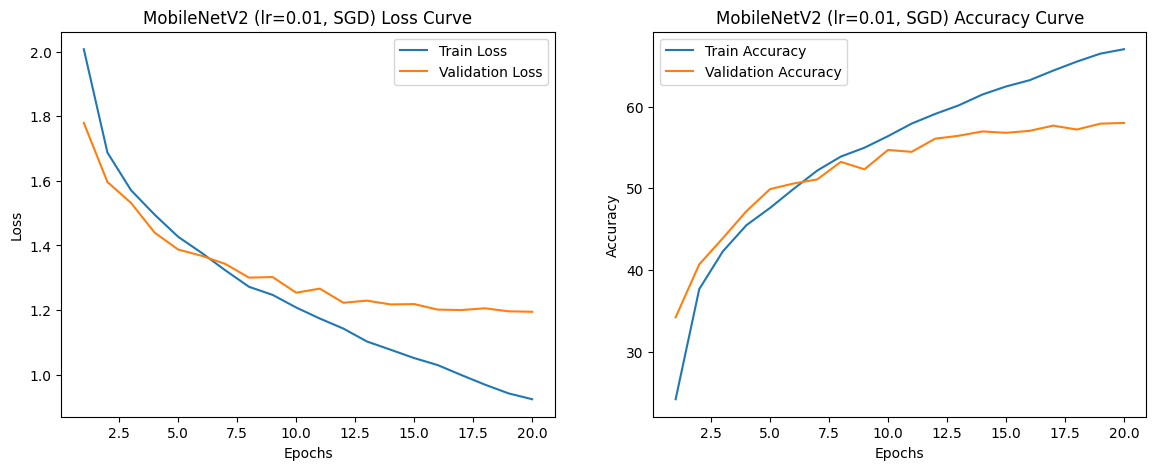


Training MobileNetV2 with SGD_NESTEROV optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:26<00:00, 23.67it/s]


Train Loss: 1.9356, Train Acc: 30.65%, Val Loss: 1.6716, Val Acc: 39.20%


Epoch 2/20: 100%|██████████| 625/625 [00:26<00:00, 23.40it/s]


Train Loss: 1.5725, Train Acc: 43.73%, Val Loss: 1.4715, Val Acc: 47.14%


Epoch 3/20: 100%|██████████| 625/625 [00:26<00:00, 23.42it/s]


Train Loss: 1.4104, Train Acc: 50.22%, Val Loss: 1.3184, Val Acc: 52.70%


Epoch 4/20: 100%|██████████| 625/625 [00:26<00:00, 23.45it/s]


Train Loss: 1.2901, Train Acc: 54.03%, Val Loss: 1.2567, Val Acc: 54.97%


Epoch 5/20: 100%|██████████| 625/625 [00:26<00:00, 23.43it/s]


Train Loss: 1.1950, Train Acc: 57.93%, Val Loss: 1.2217, Val Acc: 56.27%


Epoch 6/20: 100%|██████████| 625/625 [00:26<00:00, 23.57it/s]


Train Loss: 1.1186, Train Acc: 60.73%, Val Loss: 1.1464, Val Acc: 59.81%


Epoch 7/20: 100%|██████████| 625/625 [00:26<00:00, 23.55it/s]


Train Loss: 1.0483, Train Acc: 63.36%, Val Loss: 1.1094, Val Acc: 60.50%


Epoch 8/20: 100%|██████████| 625/625 [00:26<00:00, 23.66it/s]


Train Loss: 0.9833, Train Acc: 65.67%, Val Loss: 1.0638, Val Acc: 62.54%


Epoch 9/20: 100%|██████████| 625/625 [00:26<00:00, 23.60it/s]


Train Loss: 0.9374, Train Acc: 67.33%, Val Loss: 1.0673, Val Acc: 62.06%


Epoch 10/20: 100%|██████████| 625/625 [00:26<00:00, 23.56it/s]


Train Loss: 0.8898, Train Acc: 69.08%, Val Loss: 1.0035, Val Acc: 64.79%


Epoch 11/20: 100%|██████████| 625/625 [00:26<00:00, 23.67it/s]


Train Loss: 0.8396, Train Acc: 70.81%, Val Loss: 1.0269, Val Acc: 64.46%


Epoch 12/20: 100%|██████████| 625/625 [00:26<00:00, 23.73it/s]


Train Loss: 0.8018, Train Acc: 71.85%, Val Loss: 0.9820, Val Acc: 66.48%


Epoch 13/20: 100%|██████████| 625/625 [00:26<00:00, 23.66it/s]


Train Loss: 0.7558, Train Acc: 73.58%, Val Loss: 0.9928, Val Acc: 66.13%


Epoch 14/20: 100%|██████████| 625/625 [00:26<00:00, 23.66it/s]


Train Loss: 0.7207, Train Acc: 74.87%, Val Loss: 0.9833, Val Acc: 65.83%


Epoch 15/20: 100%|██████████| 625/625 [00:26<00:00, 23.71it/s]


Train Loss: 0.6935, Train Acc: 75.82%, Val Loss: 0.9568, Val Acc: 67.14%


Epoch 16/20: 100%|██████████| 625/625 [00:26<00:00, 23.81it/s]


Train Loss: 0.6557, Train Acc: 76.89%, Val Loss: 0.9749, Val Acc: 66.83%


Epoch 17/20: 100%|██████████| 625/625 [00:26<00:00, 23.81it/s]


Train Loss: 0.6359, Train Acc: 77.78%, Val Loss: 1.0034, Val Acc: 66.38%


Epoch 18/20: 100%|██████████| 625/625 [00:26<00:00, 23.73it/s]


Train Loss: 0.6044, Train Acc: 78.91%, Val Loss: 0.9843, Val Acc: 67.02%
Early stopping triggered


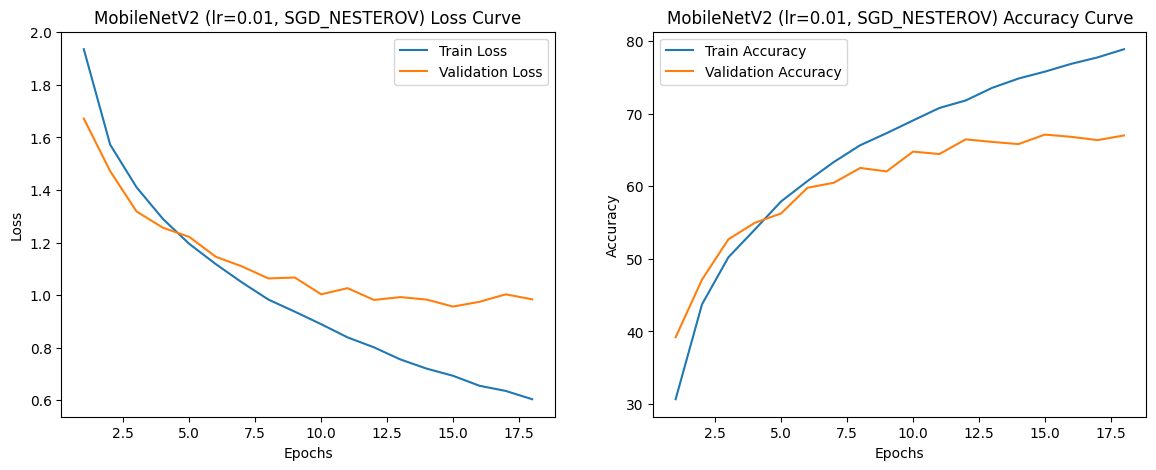


Training MobileNetV2 with ADAM optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:27<00:00, 22.65it/s]


Train Loss: 1.9108, Train Acc: 28.68%, Val Loss: 1.6023, Val Acc: 40.97%


Epoch 2/20: 100%|██████████| 625/625 [00:27<00:00, 22.46it/s]


Train Loss: 1.5629, Train Acc: 42.95%, Val Loss: 1.4542, Val Acc: 46.48%


Epoch 3/20: 100%|██████████| 625/625 [00:27<00:00, 22.63it/s]


Train Loss: 1.4307, Train Acc: 48.57%, Val Loss: 1.3409, Val Acc: 51.98%


Epoch 4/20: 100%|██████████| 625/625 [00:27<00:00, 22.68it/s]


Train Loss: 1.3042, Train Acc: 53.78%, Val Loss: 1.2864, Val Acc: 54.49%


Epoch 5/20: 100%|██████████| 625/625 [00:27<00:00, 22.73it/s]


Train Loss: 1.1994, Train Acc: 57.71%, Val Loss: 1.1462, Val Acc: 59.96%


Epoch 6/20: 100%|██████████| 625/625 [00:27<00:00, 22.76it/s]


Train Loss: 1.0924, Train Acc: 61.85%, Val Loss: 1.0832, Val Acc: 61.73%


Epoch 7/20: 100%|██████████| 625/625 [00:27<00:00, 22.77it/s]


Train Loss: 1.0235, Train Acc: 64.27%, Val Loss: 1.0586, Val Acc: 62.40%


Epoch 8/20: 100%|██████████| 625/625 [00:27<00:00, 22.59it/s]


Train Loss: 0.9476, Train Acc: 67.16%, Val Loss: 0.9973, Val Acc: 64.79%


Epoch 9/20: 100%|██████████| 625/625 [00:27<00:00, 22.75it/s]


Train Loss: 0.8886, Train Acc: 69.33%, Val Loss: 0.9703, Val Acc: 66.16%


Epoch 10/20: 100%|██████████| 625/625 [00:27<00:00, 22.56it/s]


Train Loss: 0.8274, Train Acc: 71.64%, Val Loss: 0.9194, Val Acc: 67.97%


Epoch 11/20: 100%|██████████| 625/625 [00:27<00:00, 22.77it/s]


Train Loss: 0.7773, Train Acc: 73.30%, Val Loss: 0.9383, Val Acc: 67.48%


Epoch 12/20: 100%|██████████| 625/625 [00:27<00:00, 22.44it/s]


Train Loss: 0.7292, Train Acc: 74.78%, Val Loss: 0.8739, Val Acc: 69.60%


Epoch 13/20: 100%|██████████| 625/625 [00:27<00:00, 22.47it/s]


Train Loss: 0.6875, Train Acc: 76.33%, Val Loss: 0.9005, Val Acc: 69.89%


Epoch 14/20: 100%|██████████| 625/625 [00:27<00:00, 22.76it/s]


Train Loss: 0.6425, Train Acc: 77.73%, Val Loss: 0.9012, Val Acc: 69.39%


Epoch 15/20: 100%|██████████| 625/625 [00:27<00:00, 22.71it/s]


Train Loss: 0.5981, Train Acc: 79.32%, Val Loss: 0.8694, Val Acc: 70.07%


Epoch 16/20: 100%|██████████| 625/625 [00:27<00:00, 22.59it/s]


Train Loss: 0.5641, Train Acc: 80.65%, Val Loss: 0.8942, Val Acc: 70.54%


Epoch 17/20: 100%|██████████| 625/625 [00:27<00:00, 22.74it/s]


Train Loss: 0.5338, Train Acc: 81.44%, Val Loss: 0.8661, Val Acc: 71.24%


Epoch 18/20: 100%|██████████| 625/625 [00:27<00:00, 22.62it/s]


Train Loss: 0.4948, Train Acc: 82.98%, Val Loss: 0.9217, Val Acc: 70.46%


Epoch 19/20: 100%|██████████| 625/625 [00:27<00:00, 22.80it/s]


Train Loss: 0.4703, Train Acc: 83.82%, Val Loss: 0.9026, Val Acc: 71.10%


Epoch 20/20: 100%|██████████| 625/625 [00:27<00:00, 22.67it/s]


Train Loss: 0.4388, Train Acc: 84.79%, Val Loss: 0.8748, Val Acc: 71.94%
Early stopping triggered


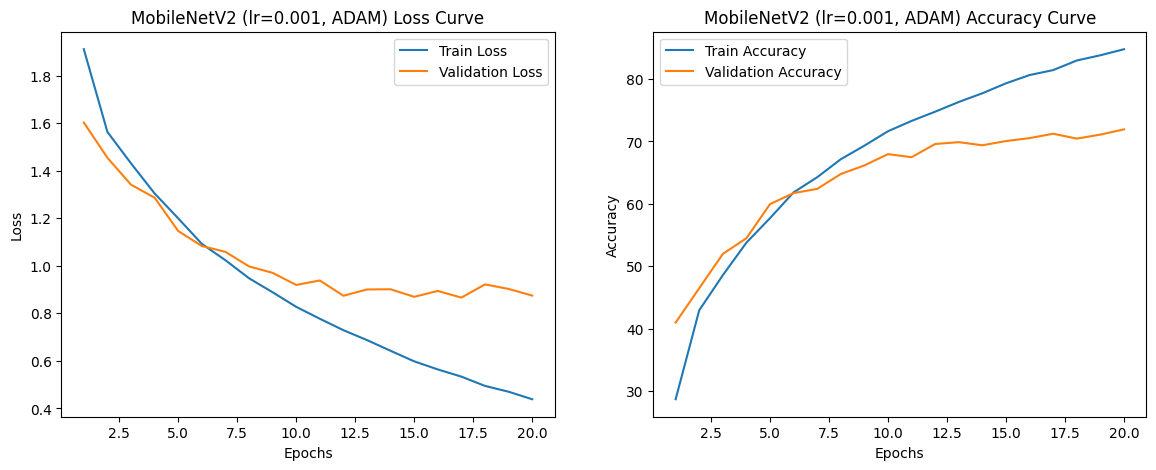


Training MobileNetV2 with SGD optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:25<00:00, 24.04it/s]


Train Loss: 2.2748, Train Acc: 13.38%, Val Loss: 2.2067, Val Acc: 16.70%


Epoch 2/20: 100%|██████████| 625/625 [00:26<00:00, 23.87it/s]


Train Loss: 2.1244, Train Acc: 19.41%, Val Loss: 2.0252, Val Acc: 22.14%


Epoch 3/20: 100%|██████████| 625/625 [00:26<00:00, 23.95it/s]


Train Loss: 1.9806, Train Acc: 23.82%, Val Loss: 1.9219, Val Acc: 25.74%


Epoch 4/20: 100%|██████████| 625/625 [00:26<00:00, 24.03it/s]


Train Loss: 1.8894, Train Acc: 26.86%, Val Loss: 1.8470, Val Acc: 29.70%


Epoch 5/20: 100%|██████████| 625/625 [00:26<00:00, 23.98it/s]


Train Loss: 1.8329, Train Acc: 29.51%, Val Loss: 1.7901, Val Acc: 31.64%


Epoch 6/20: 100%|██████████| 625/625 [00:26<00:00, 23.86it/s]


Train Loss: 1.7688, Train Acc: 32.73%, Val Loss: 1.7432, Val Acc: 34.56%


Epoch 7/20: 100%|██████████| 625/625 [00:26<00:00, 24.02it/s]


Train Loss: 1.7237, Train Acc: 34.84%, Val Loss: 1.7020, Val Acc: 36.57%


Epoch 8/20: 100%|██████████| 625/625 [00:26<00:00, 23.88it/s]


Train Loss: 1.6892, Train Acc: 36.46%, Val Loss: 1.6696, Val Acc: 37.99%


Epoch 9/20: 100%|██████████| 625/625 [00:26<00:00, 24.03it/s]


Train Loss: 1.6478, Train Acc: 38.21%, Val Loss: 1.6304, Val Acc: 39.01%


Epoch 10/20: 100%|██████████| 625/625 [00:25<00:00, 24.08it/s]


Train Loss: 1.6107, Train Acc: 39.76%, Val Loss: 1.6107, Val Acc: 40.25%


Epoch 11/20: 100%|██████████| 625/625 [00:26<00:00, 23.96it/s]


Train Loss: 1.5843, Train Acc: 40.83%, Val Loss: 1.5772, Val Acc: 41.44%


Epoch 12/20: 100%|██████████| 625/625 [00:26<00:00, 23.93it/s]


Train Loss: 1.5502, Train Acc: 42.67%, Val Loss: 1.5560, Val Acc: 42.72%


Epoch 13/20: 100%|██████████| 625/625 [00:26<00:00, 23.99it/s]


Train Loss: 1.5302, Train Acc: 43.68%, Val Loss: 1.5357, Val Acc: 43.44%


Epoch 14/20: 100%|██████████| 625/625 [00:25<00:00, 24.08it/s]


Train Loss: 1.4977, Train Acc: 44.87%, Val Loss: 1.5286, Val Acc: 43.94%


Epoch 15/20: 100%|██████████| 625/625 [00:26<00:00, 23.89it/s]


Train Loss: 1.4797, Train Acc: 45.56%, Val Loss: 1.5053, Val Acc: 44.87%


Epoch 16/20: 100%|██████████| 625/625 [00:26<00:00, 23.86it/s]


Train Loss: 1.4557, Train Acc: 46.39%, Val Loss: 1.4891, Val Acc: 45.43%


Epoch 17/20: 100%|██████████| 625/625 [00:25<00:00, 24.05it/s]


Train Loss: 1.4402, Train Acc: 47.43%, Val Loss: 1.4777, Val Acc: 45.87%


Epoch 18/20: 100%|██████████| 625/625 [00:26<00:00, 23.95it/s]


Train Loss: 1.4170, Train Acc: 48.21%, Val Loss: 1.4637, Val Acc: 46.36%


Epoch 19/20: 100%|██████████| 625/625 [00:26<00:00, 24.02it/s]


Train Loss: 1.3989, Train Acc: 48.86%, Val Loss: 1.4554, Val Acc: 47.27%


Epoch 20/20: 100%|██████████| 625/625 [00:25<00:00, 24.18it/s]


Train Loss: 1.3864, Train Acc: 49.60%, Val Loss: 1.4433, Val Acc: 47.63%


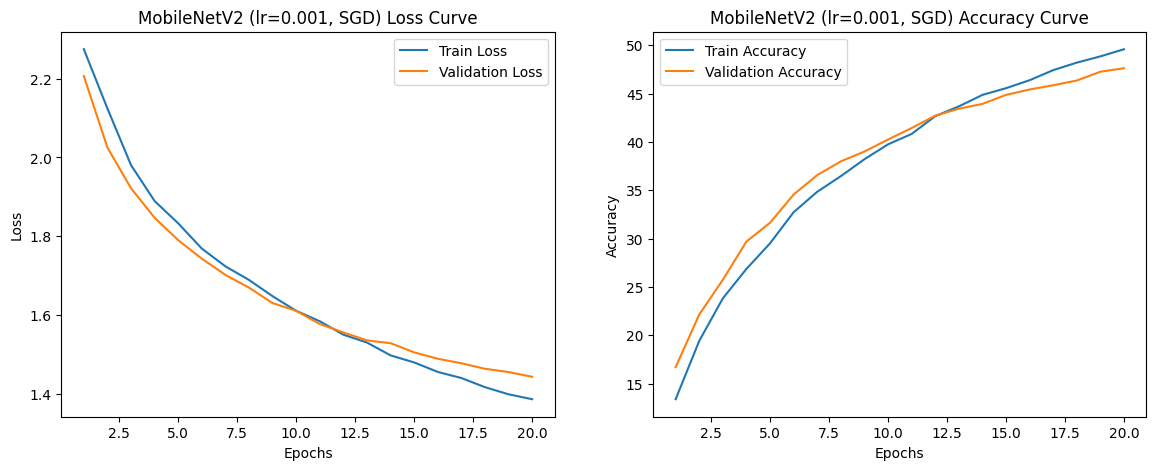


Training MobileNetV2 with SGD_NESTEROV optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:26<00:00, 23.52it/s]


Train Loss: 2.0137, Train Acc: 23.94%, Val Loss: 1.7546, Val Acc: 34.98%


Epoch 2/20: 100%|██████████| 625/625 [00:26<00:00, 23.58it/s]


Train Loss: 1.6919, Train Acc: 36.75%, Val Loss: 1.6196, Val Acc: 40.32%


Epoch 3/20: 100%|██████████| 625/625 [00:26<00:00, 23.41it/s]


Train Loss: 1.5706, Train Acc: 42.04%, Val Loss: 1.5066, Val Acc: 44.37%


Epoch 4/20: 100%|██████████| 625/625 [00:26<00:00, 23.59it/s]


Train Loss: 1.4877, Train Acc: 45.69%, Val Loss: 1.4375, Val Acc: 47.41%


Epoch 5/20: 100%|██████████| 625/625 [00:26<00:00, 23.76it/s]


Train Loss: 1.4211, Train Acc: 48.33%, Val Loss: 1.4125, Val Acc: 49.52%


Epoch 6/20: 100%|██████████| 625/625 [00:26<00:00, 23.53it/s]


Train Loss: 1.3672, Train Acc: 50.69%, Val Loss: 1.3536, Val Acc: 50.96%


Epoch 7/20: 100%|██████████| 625/625 [00:26<00:00, 23.63it/s]


Train Loss: 1.3166, Train Acc: 52.28%, Val Loss: 1.3271, Val Acc: 52.48%


Epoch 8/20: 100%|██████████| 625/625 [00:26<00:00, 23.56it/s]


Train Loss: 1.2701, Train Acc: 54.17%, Val Loss: 1.3044, Val Acc: 53.92%


Epoch 9/20: 100%|██████████| 625/625 [00:26<00:00, 23.74it/s]


Train Loss: 1.2349, Train Acc: 55.56%, Val Loss: 1.2830, Val Acc: 54.27%


Epoch 10/20: 100%|██████████| 625/625 [00:26<00:00, 23.78it/s]


Train Loss: 1.1979, Train Acc: 56.80%, Val Loss: 1.2712, Val Acc: 54.68%


Epoch 11/20: 100%|██████████| 625/625 [00:26<00:00, 23.68it/s]


Train Loss: 1.1573, Train Acc: 58.26%, Val Loss: 1.2469, Val Acc: 55.58%


Epoch 12/20: 100%|██████████| 625/625 [00:26<00:00, 23.65it/s]


Train Loss: 1.1228, Train Acc: 59.67%, Val Loss: 1.2052, Val Acc: 56.99%


Epoch 13/20: 100%|██████████| 625/625 [00:26<00:00, 23.55it/s]


Train Loss: 1.0925, Train Acc: 60.87%, Val Loss: 1.2085, Val Acc: 56.77%


Epoch 14/20: 100%|██████████| 625/625 [00:26<00:00, 23.63it/s]


Train Loss: 1.0598, Train Acc: 62.38%, Val Loss: 1.1972, Val Acc: 57.51%


Epoch 15/20: 100%|██████████| 625/625 [00:26<00:00, 23.39it/s]


Train Loss: 1.0258, Train Acc: 63.59%, Val Loss: 1.1872, Val Acc: 57.99%


Epoch 16/20: 100%|██████████| 625/625 [00:26<00:00, 23.67it/s]


Train Loss: 0.9991, Train Acc: 64.30%, Val Loss: 1.1786, Val Acc: 58.13%


Epoch 17/20: 100%|██████████| 625/625 [00:26<00:00, 23.57it/s]


Train Loss: 0.9706, Train Acc: 65.41%, Val Loss: 1.1771, Val Acc: 58.11%


Epoch 18/20: 100%|██████████| 625/625 [00:26<00:00, 23.63it/s]


Train Loss: 0.9484, Train Acc: 66.39%, Val Loss: 1.1669, Val Acc: 58.84%


Epoch 19/20: 100%|██████████| 625/625 [00:26<00:00, 23.75it/s]


Train Loss: 0.9262, Train Acc: 67.15%, Val Loss: 1.1528, Val Acc: 60.11%


Epoch 20/20: 100%|██████████| 625/625 [00:26<00:00, 23.48it/s]


Train Loss: 0.9003, Train Acc: 67.89%, Val Loss: 1.1737, Val Acc: 59.05%


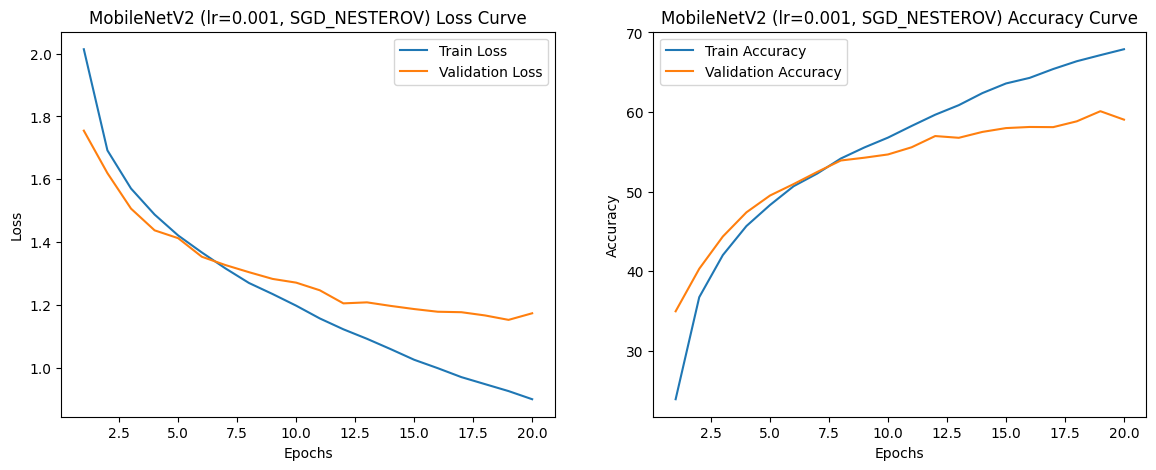


Best configuration for MobileNetV2 - Optimizer: ADAM, Learning Rate: 0.001, Validation Accuracy: 71.94%

Training VGG11 with ADAM optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:20<00:00, 29.76it/s]


Train Loss: 1079869356786491.0000, Train Acc: 9.85%, Val Loss: 2.3109, Val Acc: 9.87%


Epoch 2/20: 100%|██████████| 625/625 [00:20<00:00, 29.81it/s]


Train Loss: 18895.5148, Train Acc: 10.02%, Val Loss: 2.3054, Val Acc: 9.87%


Epoch 3/20: 100%|██████████| 625/625 [00:20<00:00, 29.99it/s]


Train Loss: 5469.3305, Train Acc: 10.19%, Val Loss: 2.3061, Val Acc: 10.05%


Epoch 4/20: 100%|██████████| 625/625 [00:20<00:00, 29.83it/s]


Train Loss: 374721.6357, Train Acc: 9.89%, Val Loss: 2.3074, Val Acc: 9.92%


Epoch 5/20: 100%|██████████| 625/625 [00:21<00:00, 29.62it/s]


Train Loss: 118.3608, Train Acc: 10.07%, Val Loss: 2.3113, Val Acc: 10.29%
Early stopping triggered


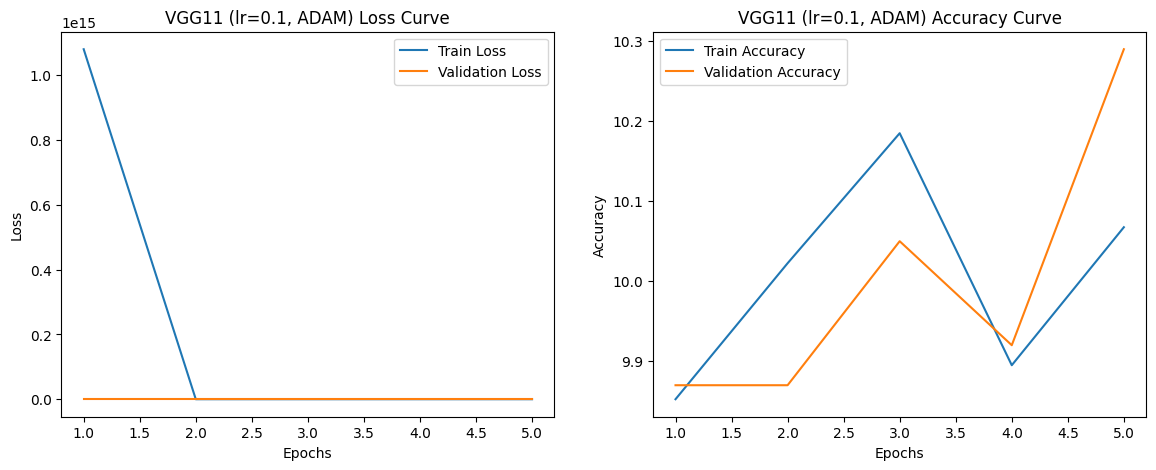


Training VGG11 with SGD optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 34.89it/s]


Train Loss: 1.9935, Train Acc: 23.50%, Val Loss: 1.7022, Val Acc: 33.40%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 35.12it/s]


Train Loss: 1.5220, Train Acc: 43.73%, Val Loss: 1.4265, Val Acc: 48.44%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 35.28it/s]


Train Loss: 1.2364, Train Acc: 55.77%, Val Loss: 1.1877, Val Acc: 58.68%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 35.24it/s]


Train Loss: 1.0154, Train Acc: 64.42%, Val Loss: 0.9261, Val Acc: 68.17%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.31it/s]


Train Loss: 0.8456, Train Acc: 70.79%, Val Loss: 0.8534, Val Acc: 70.87%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 35.16it/s]


Train Loss: 0.6990, Train Acc: 75.92%, Val Loss: 0.8159, Val Acc: 72.62%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 35.18it/s]


Train Loss: 0.5739, Train Acc: 80.64%, Val Loss: 0.8093, Val Acc: 73.11%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 35.32it/s]


Train Loss: 0.4609, Train Acc: 84.42%, Val Loss: 0.8667, Val Acc: 72.46%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 35.18it/s]


Train Loss: 0.3747, Train Acc: 87.23%, Val Loss: 0.8155, Val Acc: 75.16%


Epoch 10/20: 100%|██████████| 625/625 [00:17<00:00, 35.05it/s]


Train Loss: 0.3009, Train Acc: 89.91%, Val Loss: 0.9399, Val Acc: 73.28%
Early stopping triggered


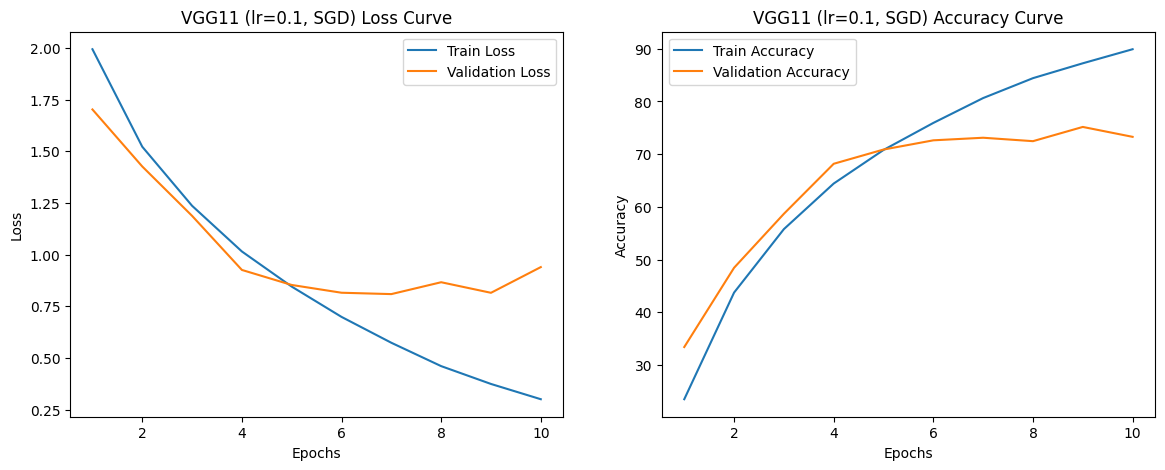


Training VGG11 with SGD_NESTEROV optimizer and learning rate 0.1


Epoch 1/20: 100%|██████████| 625/625 [00:19<00:00, 32.26it/s]


Train Loss: 2.3052, Train Acc: 10.22%, Val Loss: 2.3062, Val Acc: 10.12%


Epoch 2/20: 100%|██████████| 625/625 [00:19<00:00, 31.87it/s]


Train Loss: 2.3058, Train Acc: 10.02%, Val Loss: 2.3055, Val Acc: 9.89%


Epoch 3/20: 100%|██████████| 625/625 [00:19<00:00, 31.89it/s]


Train Loss: 2.3058, Train Acc: 10.29%, Val Loss: 2.3087, Val Acc: 9.87%


Epoch 4/20: 100%|██████████| 625/625 [00:19<00:00, 31.98it/s]


Train Loss: 2.3055, Train Acc: 10.18%, Val Loss: 2.3047, Val Acc: 9.92%


Epoch 5/20: 100%|██████████| 625/625 [00:19<00:00, 32.18it/s]


Train Loss: 2.3061, Train Acc: 10.04%, Val Loss: 2.3032, Val Acc: 9.87%


Epoch 6/20: 100%|██████████| 625/625 [00:19<00:00, 32.15it/s]


Train Loss: 2.3062, Train Acc: 9.90%, Val Loss: 2.3050, Val Acc: 10.29%


Epoch 7/20: 100%|██████████| 625/625 [00:19<00:00, 32.01it/s]


Train Loss: 2.3062, Train Acc: 9.78%, Val Loss: 2.3066, Val Acc: 10.05%


Epoch 8/20: 100%|██████████| 625/625 [00:19<00:00, 32.26it/s]


Train Loss: 2.3061, Train Acc: 9.88%, Val Loss: 2.3065, Val Acc: 10.05%
Early stopping triggered


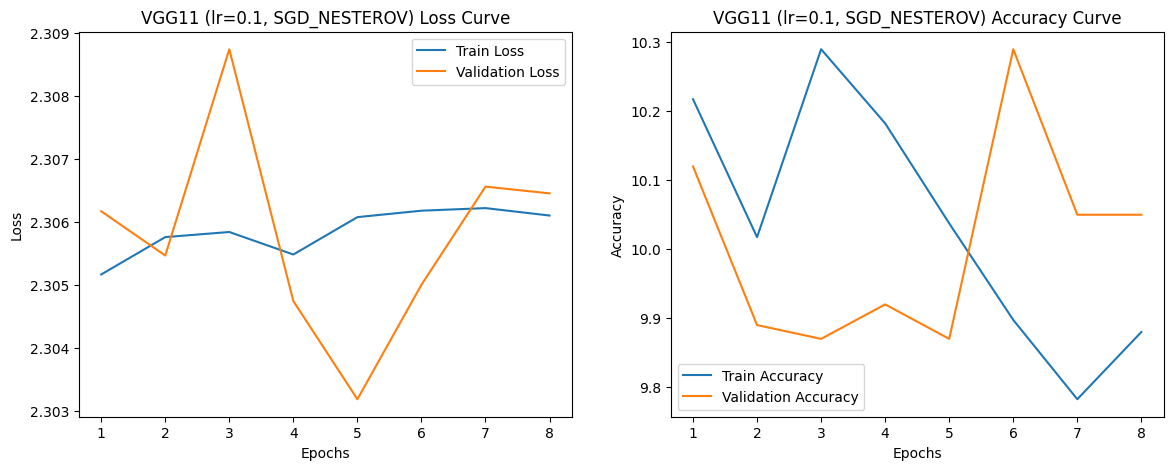


Training VGG11 with ADAM optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:21<00:00, 29.58it/s]


Train Loss: 202184.6597, Train Acc: 9.99%, Val Loss: 2.3034, Val Acc: 9.87%


Epoch 2/20: 100%|██████████| 625/625 [00:21<00:00, 29.33it/s]


Train Loss: 2.5791, Train Acc: 9.95%, Val Loss: 2.3032, Val Acc: 10.29%


Epoch 3/20: 100%|██████████| 625/625 [00:21<00:00, 29.39it/s]


Train Loss: 2.3150, Train Acc: 10.15%, Val Loss: 2.3039, Val Acc: 9.73%


Epoch 4/20: 100%|██████████| 625/625 [00:21<00:00, 29.33it/s]


Train Loss: 2.3057, Train Acc: 10.05%, Val Loss: 2.3034, Val Acc: 10.12%


Epoch 5/20: 100%|██████████| 625/625 [00:21<00:00, 29.33it/s]


Train Loss: 2.3037, Train Acc: 9.80%, Val Loss: 2.3028, Val Acc: 10.12%


Epoch 6/20: 100%|██████████| 625/625 [00:21<00:00, 29.54it/s]


Train Loss: 2.3035, Train Acc: 10.09%, Val Loss: 2.3030, Val Acc: 10.05%


Epoch 7/20: 100%|██████████| 625/625 [00:21<00:00, 29.45it/s]


Train Loss: 2.3037, Train Acc: 9.94%, Val Loss: 2.3030, Val Acc: 9.87%


Epoch 8/20: 100%|██████████| 625/625 [00:21<00:00, 29.72it/s]


Train Loss: 2.3037, Train Acc: 9.92%, Val Loss: 2.3031, Val Acc: 10.09%
Early stopping triggered


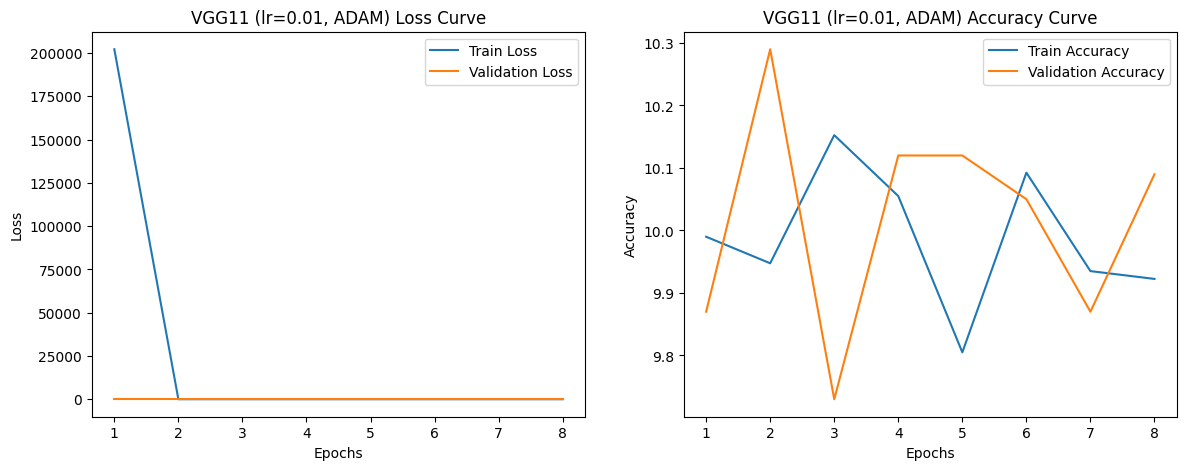


Training VGG11 with SGD optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 34.89it/s]


Train Loss: 2.1911, Train Acc: 16.87%, Val Loss: 1.9174, Val Acc: 29.05%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 35.31it/s]


Train Loss: 1.7967, Train Acc: 33.36%, Val Loss: 1.6354, Val Acc: 39.43%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 35.24it/s]


Train Loss: 1.5540, Train Acc: 42.55%, Val Loss: 1.3986, Val Acc: 49.14%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 35.40it/s]


Train Loss: 1.3983, Train Acc: 48.77%, Val Loss: 1.3487, Val Acc: 50.79%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 35.31it/s]


Train Loss: 1.2787, Train Acc: 53.34%, Val Loss: 1.1833, Val Acc: 56.85%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 35.26it/s]


Train Loss: 1.1623, Train Acc: 57.77%, Val Loss: 1.1546, Val Acc: 57.96%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 35.40it/s]


Train Loss: 1.0543, Train Acc: 61.87%, Val Loss: 1.0525, Val Acc: 62.23%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 34.98it/s]


Train Loss: 0.9543, Train Acc: 65.64%, Val Loss: 1.0195, Val Acc: 64.07%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 35.36it/s]


Train Loss: 0.8588, Train Acc: 69.65%, Val Loss: 0.9735, Val Acc: 66.06%


Epoch 10/20: 100%|██████████| 625/625 [00:17<00:00, 35.57it/s]


Train Loss: 0.7715, Train Acc: 72.69%, Val Loss: 0.8900, Val Acc: 68.72%


Epoch 11/20: 100%|██████████| 625/625 [00:17<00:00, 35.27it/s]


Train Loss: 0.6853, Train Acc: 75.73%, Val Loss: 0.8816, Val Acc: 69.95%


Epoch 12/20: 100%|██████████| 625/625 [00:17<00:00, 35.37it/s]


Train Loss: 0.6002, Train Acc: 78.79%, Val Loss: 0.8680, Val Acc: 70.49%


Epoch 13/20: 100%|██████████| 625/625 [00:17<00:00, 35.10it/s]


Train Loss: 0.5117, Train Acc: 82.00%, Val Loss: 0.8997, Val Acc: 70.71%


Epoch 14/20: 100%|██████████| 625/625 [00:17<00:00, 35.35it/s]


Train Loss: 0.4330, Train Acc: 84.77%, Val Loss: 0.9641, Val Acc: 69.43%


Epoch 15/20: 100%|██████████| 625/625 [00:17<00:00, 35.21it/s]


Train Loss: 0.3480, Train Acc: 87.74%, Val Loss: 1.0103, Val Acc: 70.65%
Early stopping triggered


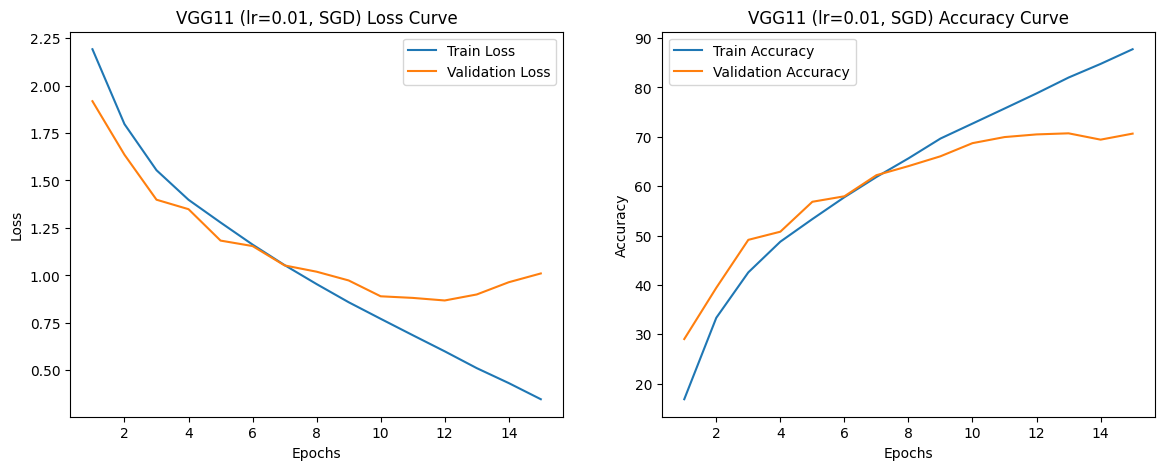


Training VGG11 with SGD_NESTEROV optimizer and learning rate 0.01


Epoch 1/20: 100%|██████████| 625/625 [00:19<00:00, 32.21it/s]


Train Loss: 1.6892, Train Acc: 36.13%, Val Loss: 1.2758, Val Acc: 53.83%


Epoch 2/20: 100%|██████████| 625/625 [00:19<00:00, 32.36it/s]


Train Loss: 1.1377, Train Acc: 58.79%, Val Loss: 1.0682, Val Acc: 62.95%


Epoch 3/20: 100%|██████████| 625/625 [00:19<00:00, 32.13it/s]


Train Loss: 0.8836, Train Acc: 69.11%, Val Loss: 0.8353, Val Acc: 71.07%


Epoch 4/20: 100%|██████████| 625/625 [00:19<00:00, 32.51it/s]


Train Loss: 0.7221, Train Acc: 75.07%, Val Loss: 0.7995, Val Acc: 72.54%


Epoch 5/20: 100%|██████████| 625/625 [00:18<00:00, 32.90it/s]


Train Loss: 0.5882, Train Acc: 79.64%, Val Loss: 0.7693, Val Acc: 74.28%


Epoch 6/20: 100%|██████████| 625/625 [00:19<00:00, 32.84it/s]


Train Loss: 0.4772, Train Acc: 83.60%, Val Loss: 0.7383, Val Acc: 76.07%


Epoch 7/20: 100%|██████████| 625/625 [00:18<00:00, 32.90it/s]


Train Loss: 0.3857, Train Acc: 86.79%, Val Loss: 0.7637, Val Acc: 76.71%


Epoch 8/20: 100%|██████████| 625/625 [00:18<00:00, 33.14it/s]


Train Loss: 0.3095, Train Acc: 89.38%, Val Loss: 0.7810, Val Acc: 76.41%


Epoch 9/20: 100%|██████████| 625/625 [00:18<00:00, 33.08it/s]


Train Loss: 0.2503, Train Acc: 91.55%, Val Loss: 0.8081, Val Acc: 77.25%
Early stopping triggered


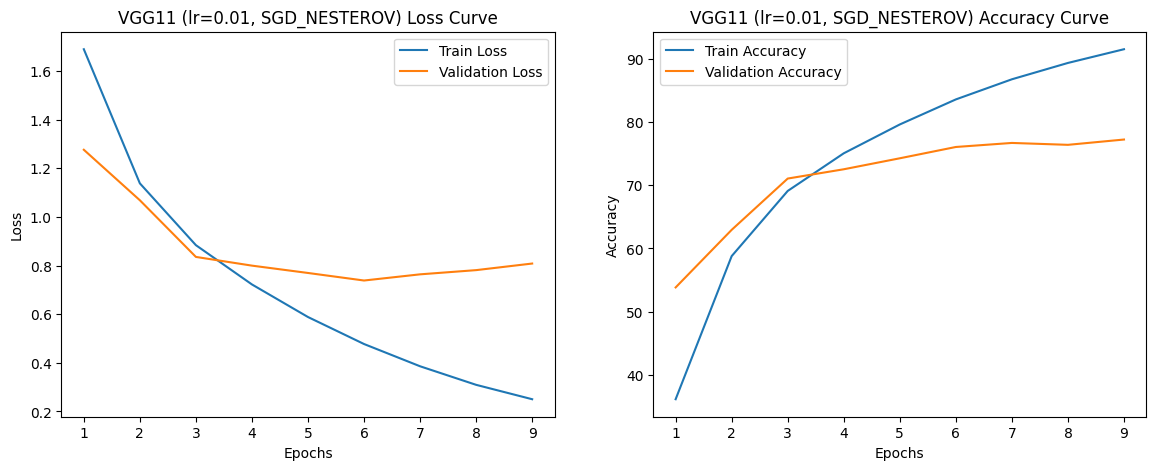


Training VGG11 with ADAM optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:20<00:00, 30.86it/s]


Train Loss: 1.9561, Train Acc: 23.09%, Val Loss: 1.5949, Val Acc: 36.05%


Epoch 2/20: 100%|██████████| 625/625 [00:20<00:00, 30.59it/s]


Train Loss: 1.4508, Train Acc: 45.82%, Val Loss: 1.2479, Val Acc: 56.05%


Epoch 3/20: 100%|██████████| 625/625 [00:20<00:00, 30.74it/s]


Train Loss: 1.1467, Train Acc: 59.78%, Val Loss: 1.2597, Val Acc: 58.52%


Epoch 4/20: 100%|██████████| 625/625 [00:20<00:00, 30.70it/s]


Train Loss: 0.9824, Train Acc: 66.30%, Val Loss: 0.9505, Val Acc: 67.15%


Epoch 5/20: 100%|██████████| 625/625 [00:20<00:00, 30.60it/s]


Train Loss: 0.8689, Train Acc: 70.77%, Val Loss: 0.8919, Val Acc: 70.01%


Epoch 6/20: 100%|██████████| 625/625 [00:20<00:00, 30.67it/s]


Train Loss: 0.7847, Train Acc: 73.71%, Val Loss: 0.8838, Val Acc: 70.16%


Epoch 7/20: 100%|██████████| 625/625 [00:20<00:00, 30.64it/s]


Train Loss: 0.6974, Train Acc: 76.91%, Val Loss: 0.8937, Val Acc: 70.90%


Epoch 8/20: 100%|██████████| 625/625 [00:20<00:00, 30.82it/s]


Train Loss: 0.6457, Train Acc: 78.98%, Val Loss: 0.9362, Val Acc: 69.81%


Epoch 9/20: 100%|██████████| 625/625 [00:20<00:00, 30.68it/s]


Train Loss: 0.5996, Train Acc: 80.46%, Val Loss: 0.8933, Val Acc: 73.57%
Early stopping triggered


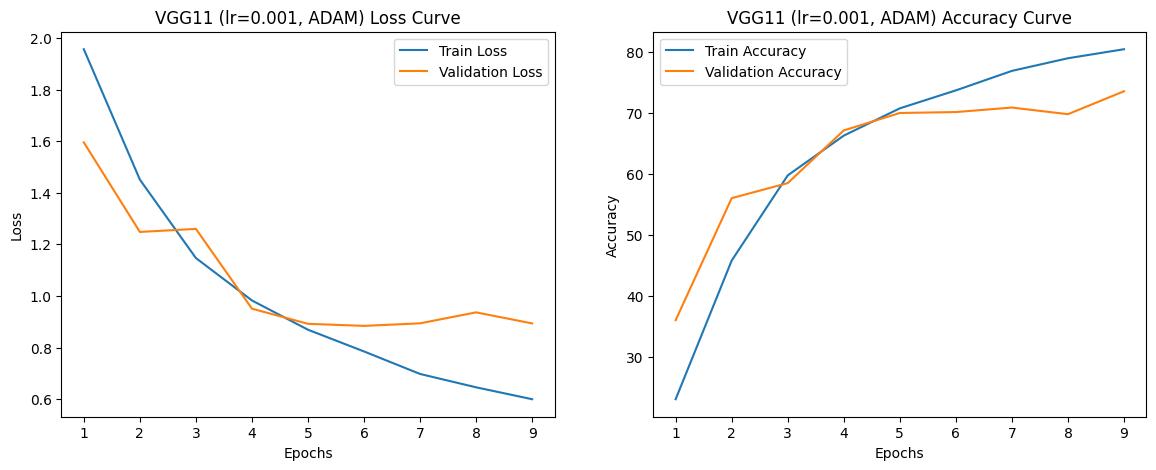


Training VGG11 with SGD optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:17<00:00, 36.23it/s]


Train Loss: 2.3011, Train Acc: 10.34%, Val Loss: 2.2987, Val Acc: 12.65%


Epoch 2/20: 100%|██████████| 625/625 [00:17<00:00, 36.58it/s]


Train Loss: 2.2977, Train Acc: 10.74%, Val Loss: 2.2946, Val Acc: 12.30%


Epoch 3/20: 100%|██████████| 625/625 [00:17<00:00, 36.56it/s]


Train Loss: 2.2935, Train Acc: 10.87%, Val Loss: 2.2887, Val Acc: 12.14%


Epoch 4/20: 100%|██████████| 625/625 [00:17<00:00, 36.29it/s]


Train Loss: 2.2862, Train Acc: 11.52%, Val Loss: 2.2775, Val Acc: 12.72%


Epoch 5/20: 100%|██████████| 625/625 [00:17<00:00, 36.26it/s]


Train Loss: 2.2701, Train Acc: 13.07%, Val Loss: 2.2499, Val Acc: 18.10%


Epoch 6/20: 100%|██████████| 625/625 [00:17<00:00, 36.58it/s]


Train Loss: 2.2276, Train Acc: 17.44%, Val Loss: 2.1746, Val Acc: 22.69%


Epoch 7/20: 100%|██████████| 625/625 [00:17<00:00, 36.42it/s]


Train Loss: 2.1298, Train Acc: 21.83%, Val Loss: 2.0486, Val Acc: 25.17%


Epoch 8/20: 100%|██████████| 625/625 [00:17<00:00, 36.61it/s]


Train Loss: 2.0254, Train Acc: 24.04%, Val Loss: 1.9661, Val Acc: 27.07%


Epoch 9/20: 100%|██████████| 625/625 [00:17<00:00, 36.37it/s]


Train Loss: 1.9530, Train Acc: 26.57%, Val Loss: 1.8941, Val Acc: 29.33%


Epoch 10/20: 100%|██████████| 625/625 [00:17<00:00, 36.49it/s]


Train Loss: 1.8785, Train Acc: 29.12%, Val Loss: 1.8302, Val Acc: 31.41%


Epoch 11/20: 100%|██████████| 625/625 [00:17<00:00, 36.15it/s]


Train Loss: 1.8066, Train Acc: 31.48%, Val Loss: 1.7484, Val Acc: 34.41%


Epoch 12/20: 100%|██████████| 625/625 [00:17<00:00, 36.56it/s]


Train Loss: 1.7502, Train Acc: 33.97%, Val Loss: 1.6799, Val Acc: 36.80%


Epoch 13/20: 100%|██████████| 625/625 [00:17<00:00, 36.73it/s]


Train Loss: 1.7053, Train Acc: 35.38%, Val Loss: 1.6347, Val Acc: 38.80%


Epoch 14/20: 100%|██████████| 625/625 [00:17<00:00, 36.56it/s]


Train Loss: 1.6602, Train Acc: 37.40%, Val Loss: 1.6097, Val Acc: 40.09%


Epoch 15/20: 100%|██████████| 625/625 [00:17<00:00, 36.58it/s]


Train Loss: 1.6241, Train Acc: 38.93%, Val Loss: 1.5696, Val Acc: 41.02%


Epoch 16/20: 100%|██████████| 625/625 [00:17<00:00, 36.42it/s]


Train Loss: 1.5904, Train Acc: 40.66%, Val Loss: 1.5580, Val Acc: 42.41%


Epoch 17/20: 100%|██████████| 625/625 [00:17<00:00, 36.40it/s]


Train Loss: 1.5562, Train Acc: 41.72%, Val Loss: 1.5345, Val Acc: 43.40%


Epoch 18/20: 100%|██████████| 625/625 [00:17<00:00, 36.33it/s]


Train Loss: 1.5188, Train Acc: 43.14%, Val Loss: 1.4676, Val Acc: 45.79%


Epoch 19/20: 100%|██████████| 625/625 [00:17<00:00, 36.38it/s]


Train Loss: 1.4888, Train Acc: 44.53%, Val Loss: 1.4679, Val Acc: 44.93%


Epoch 20/20: 100%|██████████| 625/625 [00:17<00:00, 36.63it/s]


Train Loss: 1.4518, Train Acc: 46.13%, Val Loss: 1.4021, Val Acc: 47.95%


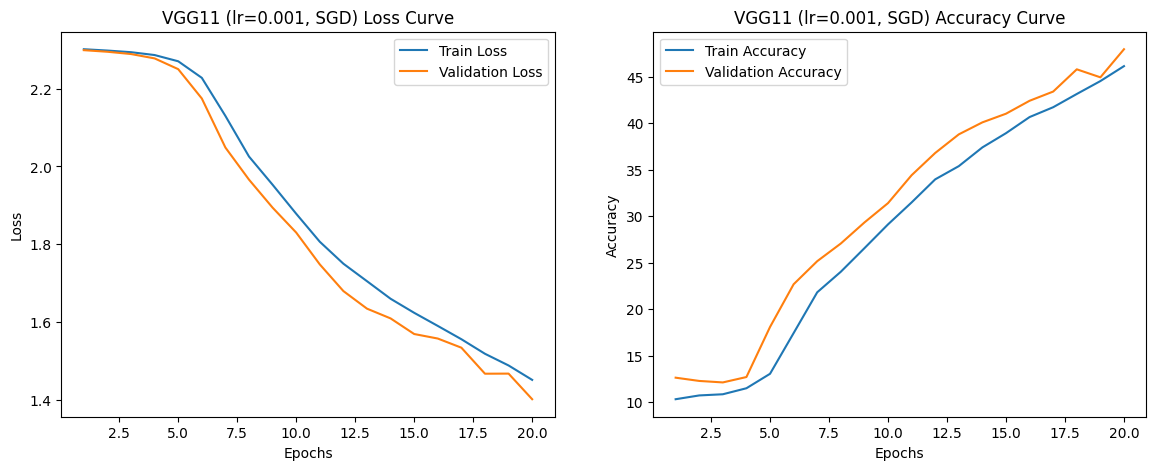


Training VGG11 with SGD_NESTEROV optimizer and learning rate 0.001


Epoch 1/20: 100%|██████████| 625/625 [00:18<00:00, 33.41it/s]


Train Loss: 2.2074, Train Acc: 15.24%, Val Loss: 1.9466, Val Acc: 29.13%


Epoch 2/20: 100%|██████████| 625/625 [00:18<00:00, 33.45it/s]


Train Loss: 1.7380, Train Acc: 34.52%, Val Loss: 1.5344, Val Acc: 42.55%


Epoch 3/20: 100%|██████████| 625/625 [00:18<00:00, 33.10it/s]


Train Loss: 1.4597, Train Acc: 45.69%, Val Loss: 1.3672, Val Acc: 49.94%


Epoch 4/20: 100%|██████████| 625/625 [00:18<00:00, 33.27it/s]


Train Loss: 1.2942, Train Acc: 52.23%, Val Loss: 1.1759, Val Acc: 56.85%


Epoch 5/20: 100%|██████████| 625/625 [00:18<00:00, 33.20it/s]


Train Loss: 1.1474, Train Acc: 58.04%, Val Loss: 1.1342, Val Acc: 58.78%


Epoch 6/20: 100%|██████████| 625/625 [00:18<00:00, 33.08it/s]


Train Loss: 1.0263, Train Acc: 62.89%, Val Loss: 0.9930, Val Acc: 64.12%


Epoch 7/20: 100%|██████████| 625/625 [00:18<00:00, 33.21it/s]


Train Loss: 0.9153, Train Acc: 66.69%, Val Loss: 0.9181, Val Acc: 67.18%


Epoch 8/20: 100%|██████████| 625/625 [00:18<00:00, 33.02it/s]


Train Loss: 0.8178, Train Acc: 70.51%, Val Loss: 0.8745, Val Acc: 68.76%


Epoch 9/20: 100%|██████████| 625/625 [00:18<00:00, 33.02it/s]


Train Loss: 0.7201, Train Acc: 74.31%, Val Loss: 0.8954, Val Acc: 68.93%


Epoch 10/20: 100%|██████████| 625/625 [00:18<00:00, 33.30it/s]


Train Loss: 0.6315, Train Acc: 77.41%, Val Loss: 0.8360, Val Acc: 71.60%


Epoch 11/20: 100%|██████████| 625/625 [00:18<00:00, 33.25it/s]


Train Loss: 0.5452, Train Acc: 80.55%, Val Loss: 0.9069, Val Acc: 70.36%


Epoch 12/20: 100%|██████████| 625/625 [00:18<00:00, 33.29it/s]


Train Loss: 0.4645, Train Acc: 83.44%, Val Loss: 0.9263, Val Acc: 72.02%


Epoch 13/20: 100%|██████████| 625/625 [00:18<00:00, 33.03it/s]


Train Loss: 0.3883, Train Acc: 86.13%, Val Loss: 0.8538, Val Acc: 73.49%
Early stopping triggered


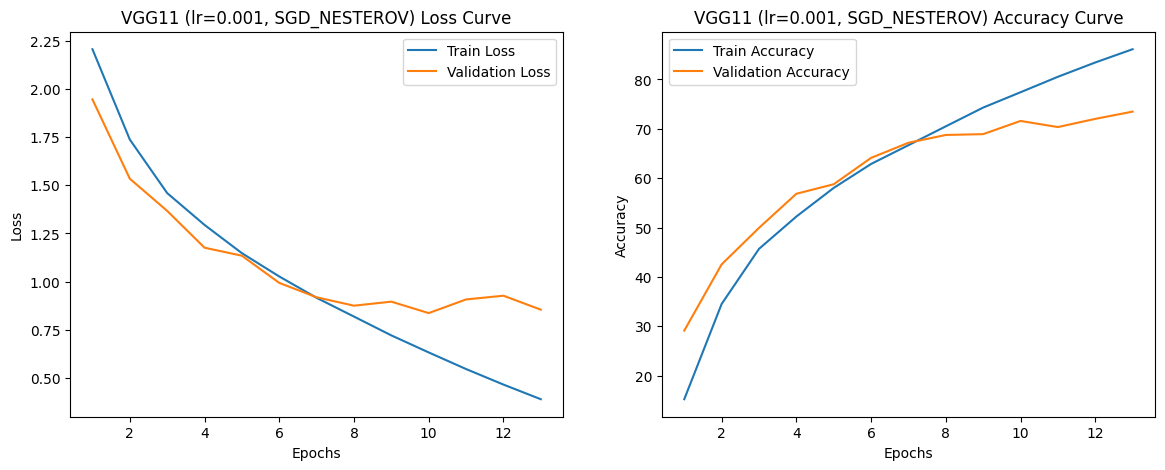


Best configuration for VGG11 - Optimizer: SGD_NESTEROV, Learning Rate: 0.01, Validation Accuracy: 77.25%

Evaluating the best model (VGG11) on the test set:
Best Model (VGG11) Test Accuracy: 76.85%


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split, Subset
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters and configurations
batch_size = 64
subset_ratio = 1  # Use 100% of CIFAR-10 for training and validation
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['adam', 'sgd', 'sgd_nesterov']
num_epochs = 20

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Use a subset of the training dataset
train_size = int(subset_ratio * len(full_train_dataset))
val_size = int(train_size * 0.2)  # Use 20% of the subset for validation
train_indices = np.random.choice(len(full_train_dataset), train_size, replace=False)
train_subset = Subset(full_train_dataset, train_indices)
val_subset, train_subset = random_split(train_subset, [val_size, train_size - val_size])

# Data loaders for the subsets
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model
def initialize_model(model_name):
    if model_name == 'ResNet18':
        model = models.resnet18(weights=None, num_classes=10)
    elif model_name == 'MobileNetV2':
        model = models.mobilenet_v2(weights=None, num_classes=10)
    elif model_name == 'VGG11':
        model = models.vgg11(weights=None, num_classes=10)
    return model.to(device)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=3):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0

    def check(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience

# Training and validation function with early stopping
def train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    early_stopping = EarlyStopping(patience=3)
    train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_losses.append(running_loss / total)
        train_accuracies.append(100 * correct / total)

        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        val_losses.append(val_loss / total)
        val_accuracies.append(100 * correct / total)
        print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")

        # Early stopping check
        if early_stopping.check(val_losses[-1]):
            print("Early stopping triggered")
            break

    return train_losses, train_accuracies, val_losses, val_accuracies

# Plot learning curve
def plot_learning_curve(train_losses, val_losses, train_accuracies, val_accuracies, title):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} Loss Curve")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{title} Accuracy Curve")
    plt.legend()
    plt.show()

# Evaluate model
def evaluate_metrics(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Hyperparameter tuning loop
best_models = {}
best_accuracies = {}

for model_name in ['ResNet18', 'MobileNetV2', 'VGG11']:
    best_val_acc = 0
    best_lr = None
    best_optimizer_name = None
    best_model_state = None

    for lr in learning_rates:
        for optimizer_name in optimizers:
            model = initialize_model(model_name)
            # Set optimizer
            if optimizer_name == 'adam':
                optimizer = optim.Adam(model.parameters(), lr=lr)
            elif optimizer_name == 'sgd':
                optimizer = optim.SGD(model.parameters(), lr=lr)
            elif optimizer_name == 'sgd_nesterov':
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True)

            criterion = nn.CrossEntropyLoss()

            print(f"\nTraining {model_name} with {optimizer_name.upper()} optimizer and learning rate {lr}")
            train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs)

            if max(val_accuracies) > best_val_acc:
                best_val_acc = max(val_accuracies)
                best_lr = lr
                best_optimizer_name = optimizer_name
                best_model_state = model.state_dict()

            plot_learning_curve(train_losses, val_losses, train_accuracies, val_accuracies, f"{model_name} (lr={lr}, {optimizer_name.upper()})")

    print(f"\nBest configuration for {model_name} - Optimizer: {best_optimizer_name.upper()}, Learning Rate: {best_lr}, Validation Accuracy: {best_val_acc:.2f}%")
    model.load_state_dict(best_model_state)
    best_models[model_name] = model
    best_accuracies[model_name] = best_val_acc

# Select the best model across all architectures
best_model_name = max(best_accuracies, key=best_accuracies.get)
best_model = best_models[best_model_name]

# Final evaluation on the test set
print(f"\nEvaluating the best model ({best_model_name}) on the test set:")
test_accuracy = evaluate_metrics(best_model, test_loader)
print(f"Best Model ({best_model_name}) Test Accuracy: {test_accuracy:.2f}%")


Evaluating the best model (VGG11) on the test set:
Best Model (VGG11) Test Accuracy: 76.85%

Per-class accuracy for the best model (VGG11):


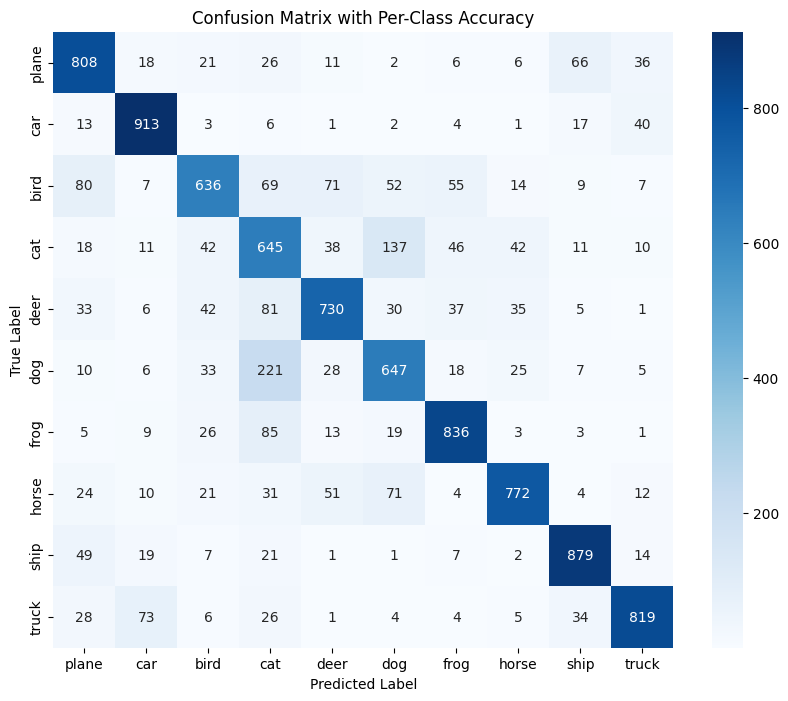

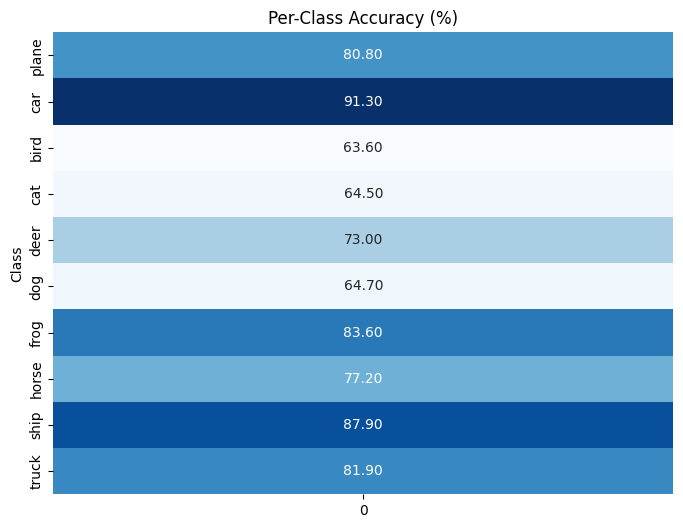

Per-class accuracy: [80.8 91.3 63.6 64.5 73.  64.7 83.6 77.2 87.9 81.9]


In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to calculate per-class accuracy and generate heatmap
def evaluate_per_class_accuracy(model, loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1) * 100

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix with Per-Class Accuracy")
    plt.show()

    # Display per-class accuracy as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(per_class_accuracy.reshape(-1, 1), annot=True, cmap="Blues", yticklabels=class_names, cbar=False, fmt=".2f")
    plt.ylabel("Class")
    plt.title("Per-Class Accuracy (%)")
    plt.show()

    return per_class_accuracy

# Class names for CIFAR-10
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Final evaluation on the test set
print(f"\nEvaluating the best model ({best_model_name}) on the test set:")
test_accuracy = evaluate_metrics(best_model, test_loader)
print(f"Best Model ({best_model_name}) Test Accuracy: {test_accuracy:.2f}%")

# Generate heatmap for per-class accuracy
print(f"\nPer-class accuracy for the best model ({best_model_name}):")
per_class_accuracy = evaluate_per_class_accuracy(best_model, test_loader, class_names)
print(f"Per-class accuracy: {per_class_accuracy}")